## Module 5 Final Project
Student Name: Hazel Donaldson <br>
Student Pace: Part-time <br>
Project Due Date: <br>
Instructor Name: Victor Geislinger

## Introduction
In the past decade, the number of ways small companies and individuals can fund their projects has grown considerably. In addition to savings, bank loans, friend and family funding, crowdfunding has grown in popularity. The crowdfunding platform, Kickstarter, was created in 2009 and has an all or nothing funding model. This means that a project is only funded if it reaches its goal amount; otherwise no money is given by the backers of the project. 

A wide variety of factors contribute to the success or failure of a project, both in general and on Kickstarter. Some of these factors can be quantified, which allows for the creation of a model that can predict whether a project will fail or succeed. The aim of this project is to construct such a model and analyze Kickstarter data, in order to assist potential content creators to assess whether Kickstarter will be a viable funding option for them and what their chances of success are.

The dataset used in this project was downloaded as .csv file from a webscrape done by a webscraping site Web Robots. This dataset contains information about projects hosted on Kickstarter from April 2009 to late 2019.

# Obtaining the data
In this section, the dataset, revelant libraries and functions will be imported.

In [1]:
#Importing revelant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from matplotlib import cm
import calendar
import glob #To read all the csv files in the directory
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb

The most recent Kickstarter dataset from web robots(dated 11/14/2019) is stored in 56 seperate .csv files. Below we will create a list of all the files and concenate them into one dataframe:

In [2]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/Kickstarter*.csv')], ignore_index = True)

In [3]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,83,"A new range of hand dyed yarns, kits and video...","{""id"":348,""name"":""Knitting"",""slug"":""crafts/kni...",6517,US,the United States,1543962617,"{""id"":1090942696,""name"":""Nomad Yarns"",""slug"":""...",USD,$,...,nomad-yarns-knitting-kits-in-glorious-color,https://www.kickstarter.com/discover/categorie...,True,False,successful,1546923600,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",6517.0,international
1,135,Stoops Magazine is quarterly publication highl...,"{""id"":45,""name"":""Art Books"",""slug"":""publishing...",6293,US,the United States,1395694495,"{""id"":245418647,""name"":""Eby Ghafarian"",""is_reg...",USD,$,...,stoops-magazine-all-nyc-all-skateboarding,https://www.kickstarter.com/discover/categorie...,True,True,successful,1398945611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",6293.0,international
2,0,"WATCH OUR “NARROWCAST”, AS WE EXHIBIT THE HOTT...","{""id"":303,""name"":""Television"",""slug"":""film & v...",0,US,the United States,1433882045,"{""id"":1686509154,""name"":""RICHARD GACOVINO"",""is...",USD,$,...,the-las-vegas-world-exhibition-video-arena,https://www.kickstarter.com/discover/categorie...,False,False,failed,1437070062,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",0.0,international


In [4]:
#how many projects are in the dataset?
len(df)

211424

From the above code, we can see that there are 211,424 projects stored in the dataframe.

# Scrubbing the data
In this section, we will clean and pre-process the data so it is ready for EDA and modelling

In [5]:
#check the columns
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type'],
      dtype='object')

In [6]:
#Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211424 entries, 0 to 211423
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             211424 non-null  int64  
 1   blurb                     211416 non-null  object 
 2   category                  211424 non-null  object 
 3   converted_pledged_amount  211424 non-null  int64  
 4   country                   211424 non-null  object 
 5   country_displayable_name  211424 non-null  object 
 6   created_at                211424 non-null  int64  
 7   creator                   211424 non-null  object 
 8   currency                  211424 non-null  object 
 9   currency_symbol           211424 non-null  object 
 10  currency_trailing_code    211424 non-null  bool   
 11  current_currency          211424 non-null  object 
 12  deadline                  211424 non-null  int64  
 13  disable_communication     211424 non-null  b

Description of each column: <br>
backers_count: number of people who contributed to each project <br>
blurb: description of the project <br>
category: contains type of project and sub-category <br>
converted_pledged_amount: amount of money pledged <br>
country: country project creator is from <br>
country_displayable_name : same as above <br>
created_at: date and time project was intially created on Kickstarter <br>
creator: Name of project creator and other information eg., their Kickstarter id <br>
currency: original currency the project goal was denominated in <br>
currency_symbol: symbol the original currency the project goal was denominated in <br>
currency_trailing_code: code of the original currency the project goal was denominated in <br>
current_currency: currency the project goal was converted to <br>
deadline: date and time project will close for donations <br>
disable_communication: whether or not project creator disable communication with backers <br>
friends: unclear <br>
fx_rate: foreign exchange rate between original currency and current_currency <br>
goal: funding goal<br>
id: id number of project <br>
is_backing: unclear <br>
is_starrable: whether or not a project can be starred (liked and shared) by users <br>
is_starred: whether or not project is starred (liked and shared) by users <br>
launched_at: date and time project was launched for funding <br>
location: the town or city of project creator <br>
name: name of project <br>
permissions: unclear <br>
photo: contains a link and information to the project's photos <br>
pledged: amount of pledges in current_currency <br>
profile: details about project's profile, including id number <br>
slug: name of project with hypens instead of spaces <br>
source_url: url of project's category <br>
spotlight: after a project has been successful, it is spotlighted on Kickstarter's website <br>
staff_pick: whether or not project was highlighted as a staff pick after project was launched <br>
state: whether or not project was successful, failed, was cancelled, launched or went live <br>
state_changed_at: date and time project's state changed <br>
static_usd_rate: conversion rate between current_currency and USD <br>
urls: url to project's page <br>
usd_pledged: amount pledged in USD <br>
usd_type: domestic or international <br>
Some of the columns with few non-null entries, can be dropped.

In [7]:
df.drop(['friends', 'is_backing', 'permissions'], axis = 1, inplace =True)

A few of the other columns can also be dropped because they don't suit the purposes of this project. This includes: <br>
converted_pledged_amount: most of the currencies are in USD. will use usd_pledged instead <br>
creator: most of the projects are created by multiple people so it's not useful to categorize projects <br>
currency: since will be using USD as primary currency, it's not neccessary to keep original currency <br>
currency_symbol: same as above <br>
currency_trailing_code: same as above <br>
current_currency: same as above <br>
fx_rate: doesn't always convert to the dollar so static_usd_rate will be used instead because it's all one currency <br>
photo: image processing is beyond the scope of project <br>
profile: contains information found in other columns (id,state, dates) <br>
slug: just the names with hyphens instead of spaces <br>
spotlight: only contains projects that are successful and will be highly correlated with successful projects <br>
source_url: not useful because each is as unique as an id <br>
state_changed_at: is the same as deadline for most projects with exception of projects that were cancelled(those projects aren't used in this analysis) <br>
urls: same as source url <br>
usd_type: not clear what this column means <br>

In [8]:
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency',
        'fx_rate','photo','is_starred','profile','pledged', 'slug', 'source_url', 'state_changed_at','spotlight', 'urls', 'usd_type'], axis = 1, inplace = True)

Next the columns with dates and times need to be converted:

In [9]:
#convert dates from unix to datetimes
convert_cols = ['created_at','deadline', 'launched_at']
for col in convert_cols:
    df[col] = pd.to_datetime(df[col], origin = 'unix', unit = 's')

In [10]:
#timeline of projects
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 13 November 2019.


The individual columns will be preprocessed and additional features will be engineered if necessary.

### Blurb
At the moment, natural language processing is outside the scope of this project. But the length of the blurb is important to whether backers will fund a project (eg., a longer blurb are more or less preferrable to backers). The original blurb feature will be dropped.

In [11]:
df['blurb_length'] = df['blurb'].str.split().str.len()
#drop blurb column
df.drop('blurb', axis = 1, inplace = True)

### Category

In [12]:
#what does the category column look like?
df.iloc[0]['category']

'{"id":348,"name":"Knitting","slug":"crafts/knitting","position":6,"parent_id":26,"color":16744876,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/crafts/knitting"}}}'

In [13]:
#find subcategories
f = lambda x: x['category'].split('/')[1].split('"," position')[0]
df['sub_category'] = df.apply(f, axis = 1)
# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [14]:
df.head()

,backers_count,category,country,country_displayable_name,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,location,name,staff_pick,state,static_usd_rate,usd_pledged,blurb_length,sub_category
0,83,crafts,US,the United States,2018-12-04 22:30:17,2019-01-08 05:00:00,False,2000.0,217900996,False,2018-12-08 14:01:36,"{""id"":2473359,""name"":""Plainfield"",""slug"":""plai...",Nomad Yarns : Knitting kits in glorious color,False,successful,1.0,6517.0,15.0,"knitting"",""position"":6,""parent_id"":26,""color"":..."
1,135,publishing,US,the United States,2014-03-24 20:54:55,2014-05-01 12:00:00,False,5000.0,1553472644,False,2014-03-30 23:34:10,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...","Stoops Magazine - All NYC, All skateboarding.",True,successful,1.0,6293.0,13.0,"art books"",""position"":3,""parent_id"":18,""color""..."
2,0,film & video,US,the United States,2015-06-09 20:34:05,2015-07-16 18:07:41,False,30000.0,1264567501,False,2015-06-16 18:07:41,"{""id"":2436704,""name"":""Las Vegas"",""slug"":""las-v...",The Las Vegas-World Exhibition Video Arena,False,failed,1.0,0.0,19.0,"television"",""position"":17,""parent_id"":11,""colo..."
3,9,fashion,US,the United States,2011-11-02 00:42:24,2015-01-24 05:13:13,False,1700.0,630840081,False,2014-11-25 05:13:13,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",Stevin Gold Footwear: The Corked Casual Wingti...,False,successful,1.0,1701.0,19.0,"footwear"",""position"":5,""parent_id"":9,""color"":1..."
4,155,journalism,US,the United States,2015-03-29 22:30:58,2015-04-21 04:00:00,False,20500.0,1685109824,False,2015-04-06 23:38:06,"{""id"":2391279,""name"":""Denver"",""slug"":""denver-c...",Life with Lisa Williams,False,successful,1.0,23044.0,24.0,"audio"",""position"":1,""parent_id"":13,""color"":122..."


### Disable_communication

In [15]:
df.disable_communication.value_counts(normalize = True)

False    0.996968
True     0.003032
Name: disable_communication, dtype: float64

A majority of creators do not disable communications to potential backers. Because 99% of all project have this value for this variable, it will be dropped because it doesn't provide any relevant information.

In [16]:
df.drop('disable_communication', axis = 1, inplace = True)

### Goal

At the moment, the goal is recorded in native currencies. In order to allow for fair comparisons, all the currencies will be converted into dollars

In [17]:
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'], 2)

In [18]:
#drop goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis = 1, inplace = True)

### id

In [19]:
df.id.unique()

array([ 217900996, 1553472644, 1264567501, ...,   94557795,  258329901,
       1510005858])

In [20]:
#are there any duplicate projects?
print(f"Of all the {len(df)} projects in this dataset, there are {len(df[df.duplicated(subset = 'id')])} which are listed more than once. ")

Of all the 211424 projects in this dataset, there are 26889 which are listed more than once. 


### is_starrable

In [21]:
df.is_starrable.value_counts(normalize = True)

False    0.967927
True     0.032073
Name: is_starrable, dtype: float64

While only a small amount of projects are starrable(3%), this column will be kept because whether a project is saved or liked by a user can contribute to the success of a project. 

### Location

In [22]:
df.location.unique()

array(['{"id":2473359,"name":"Plainfield","slug":"plainfield-hendricks-in","short_name":"Plainfield, IN","displayable_name":"Plainfield, IN","localized_name":"Plainfield","country":"US","state":"IN","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/plainfield-hendricks-in","location":"https://www.kickstarter.com/locations/plainfield-hendricks-in"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1573770894.62e3be3b5c9c497cd2721bb75c273144a253cfe8&woe_id=2473359"}}}',
       '{"id":2459115,"name":"New York","slug":"new-york-ny","short_name":"New York, NY","displayable_name":"New York, NY","localized_name":"New York","country":"US","state":"NY","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/new-york-ny","location":"https://www.kickstarter.com/locations/new-york-ny"},"api":{"nearby_projects

In [23]:
df.location.nunique()

15344

Because there a large number of location (which refers to cities/states) are we already have information about the project's origin country, this column can be dropped. One-hot encoding will not give any useful information with such a large number of locations.

In [24]:
df.drop('location', axis = 1, inplace = True)

### name

Similar to the blurb column, the project name column will be assessed for length of the project name is useful to the model. The original column will then be dropped.

In [25]:
df['name_length'] = df['name'].str.split().str.len()
df.drop('name', axis = 1, inplace = True)

### usd_pledged

In [26]:
df['usd_pledged'] = round(df['usd_pledged'], 2)

### New features

Some additional features will need to be created from existing features, which may predict whether a project was successfully funded. This includes the time between creation and launching, campaign length, date of creation, date of launch, date of deadline, launch time of day, creation time of day and average pledge per backer.

In [27]:
#time from creation to launch
df['creation_to_launch'] = df['launched_at'] - df['created_at']
df['creation_to_launch'] = df['creation_to_launch'].dt.round('d').dt.days
#campaign length
df['campaign_length'] = df['deadline'] - df['launched_at']
df['campaign_length'] = df['campaign_length'].dt.round('d').dt.days
#day of week of launch
df['launch_day'] = df['launched_at'].dt.day_name()
#day of week of deadline
df['deadline_day'] = df['deadline'].dt.day_name()
#launch month
df['launch_month'] = df['launched_at'].dt.month_name()
#deadline month
df['deadline_month'] = df['deadline'].dt.month_name()

In [28]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [29]:
#Deadline time
df['deadline_hr'] = df['deadline'].dt.hour 

def two_hour_deadline(row):
    """Creates two hour bins for the deadline_hr column"""
    if row['deadline_hr'] in (0,1):
        return '12am-2am'
    if row['deadline_hr'] in (2,3):
        return '2am-4am'
    if row['deadline_hr'] in (4,5):
        return '4am-6am'
    if row['deadline_hr'] in (6,7):
        return '6am-8am'
    if row['deadline_hr'] in (8,9):
        return '8am-10am'
    if row['deadline_hr'] in (10,11):
        return '10am-12pm'
    if row['deadline_hr'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hr'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hr'] in (16, 17):
        return '4pm-6pm'
    if row['deadline_hr'] in (18, 19):
        return '6pm-8pm'
    if row['deadline_hr'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hr'] in (22,23):
        return '10pm-12am'

In [30]:
df['deadline_time'] = df.apply(two_hour_deadline, axis = 1)
df.drop('deadline_hr', axis = 1, inplace = True)

In [31]:
#Mean pledge per backer
df['plegde_per_backer'] = round(df['usd_pledged']/df['backers_count'], 2)

### Checking for null values

In [32]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
id                              0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                     0
blurb_length                    8
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch              0
campaign_length                 0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
plegde_per_backer           17312
dtype: int64

There are eight projects with no blurb length, these can be replaced with a 0.

In [33]:
df.blurb_length.fillna(0, inplace = True)

In [34]:
#Number of projects in different states
df.state.value_counts()

successful    119652
failed         75100
canceled        8681
live            7350
suspended        641
Name: state, dtype: int64

In [35]:
#keeping projects that either failed or succeeded
df = df[df['state'].isin(['successful', 'failed'])]

In [36]:
max(df.deadline)

Timestamp('2019-11-14 05:35:09')

### dealing with duplicates

In [37]:
duplicates = df[df.duplicated(subset = 'id')]
print(f"Of all the {len(df)} projects in this dataset, there are {len(df[df.duplicated(subset = 'id')])} which are listed one than once")
print(f"Oh these, {len(df[df.duplicated(subset = 'id')])} have every value in common between duplicates.")

Of all the 194752 projects in this dataset, there are 23670 which are listed one than once
Oh these, 23670 have every value in common between duplicates.


In [38]:
df.drop_duplicates(inplace = True)
len(df)

171098

In [39]:
print(len(df[df.duplicated(subset = 'id')]), "duplicated projects remain")
duplicated = df[df.duplicated(subset = 'id', keep = False)].sort_values(by = 'id')
duplicated

16 duplicated projects remain


,backers_count,category,country,country_displayable_name,created_at,deadline,id,is_starrable,launched_at,staff_pick,...,name_length,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,plegde_per_backer
51989,1214,art,AU,Australia,2019-01-11 21:53:32,2019-08-25 02:00:01,147077736,False,2019-07-04 02:00:01,True,...,9,173,52,Thursday,Sunday,July,August,2am-4am,2am-4am,154.27
61633,1214,art,AU,Australia,2019-01-11 21:53:32,2019-08-25 02:00:01,147077736,False,2019-07-04 02:00:01,True,...,9,173,52,Thursday,Sunday,July,August,2am-4am,2am-4am,153.78
132632,70,music,AU,Australia,2019-05-13 23:06:59,2019-06-20 00:25:00,192145853,False,2019-05-21 00:25:00,False,...,7,7,30,Tuesday,Thursday,May,June,12am-2am,12am-2am,73.52
130689,70,music,AU,Australia,2019-05-13 23:06:59,2019-06-20 00:25:00,192145853,False,2019-05-21 00:25:00,False,...,7,7,30,Tuesday,Thursday,May,June,12am-2am,12am-2am,74.11
182275,19,photography,FR,France,2016-05-10 08:26:30,2016-05-28 15:30:00,264602783,False,2016-05-11 01:30:55,False,...,11,1,18,Wednesday,Saturday,May,May,12am-2am,2pm-4pm,21.65
78743,19,photography,FR,France,2016-05-10 08:26:30,2016-05-28 15:30:00,264602783,False,2016-05-11 01:30:55,False,...,11,1,18,Wednesday,Saturday,May,May,12am-2am,2pm-4pm,21.62
14965,17,fashion,GB,the United Kingdom,2018-08-09 15:49:21,2018-09-26 17:30:00,472255617,False,2018-08-24 01:11:32,False,...,8,14,34,Friday,Wednesday,August,September,12am-2am,4pm-6pm,21.65
205377,17,fashion,GB,the United Kingdom,2018-08-09 15:49:21,2018-09-26 17:30:00,472255617,False,2018-08-24 01:11:32,False,...,8,14,34,Friday,Wednesday,August,September,12am-2am,4pm-6pm,21.72
206818,4059,games,AT,Austria,2019-04-24 10:17:24,2019-08-19 00:00:01,475378059,False,2019-07-22 00:00:01,False,...,8,89,28,Monday,Monday,July,August,12am-2am,12am-2am,116.72
104755,4059,games,AT,Austria,2019-04-24 10:17:24,2019-08-19 00:00:01,475378059,False,2019-07-22 00:00:01,False,...,8,89,28,Monday,Monday,July,August,12am-2am,12am-2am,116.73


Let's compare the rows with duplicated projects: 

In [40]:
#finding the duplicate ids 
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index)
    

[51989] [61633]
[132632] [130689]
[182275] [78743]
[14965] [205377]
[206818] [104755]
[165422] [191040]
[112713] [31754]
[105449] [65148]
[18054] [173272]
[133848] [165923]
[201527] [94770]
[203239] [137074]
[9953] [76927]
[164116] [170239]
[165510] [98779]
[97712] [125987]


In [41]:
df.loc[101629] == df.loc[32969]

backers_count               False
category                    False
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [42]:
df.loc[174839] == df.loc[172896]

backers_count               False
category                    False
country                     False
country_displayable_name    False
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch           True
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [43]:
df.loc[190901] == df.loc[106019]

backers_count               False
category                    False
country                     False
country_displayable_name    False
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [44]:
#df.loc[61085] == df.loc[3783]

In [45]:
df.loc[62526] == df.loc[124572]

backers_count               False
category                    False
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                  False
state                       False
usd_pledged                 False
blurb_length                 True
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                 True
deadline_month               True
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [46]:
df.loc[72857] == df.loc[17428]

backers_count               False
category                     True
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [47]:
#df.loc[170925] == df.loc[20656]

In [48]:
df.loc[125266] ==  df.loc[122265]

backers_count               False
category                    False
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [49]:
df.loc[6872]  ==  df.loc [66286]

backers_count               False
category                    False
country                     False
country_displayable_name    False
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length             False
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [50]:
df.loc[17929] == df.loc[142492]

backers_count               False
category                    False
country                     False
country_displayable_name    False
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                  False
state                        True
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                  True
creation_to_launch          False
campaign_length              True
launch_day                   True
deadline_day                 True
launch_month                False
deadline_month              False
launch_time                  True
deadline_time               False
plegde_per_backer           False
dtype: bool

In [51]:
#df.loc[151885] == df.loc[157939]

In [52]:
df.loc[164362] == df.loc[159651]

backers_count               False
category                    False
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                       False
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                 False
creation_to_launch          False
campaign_length              True
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [53]:
#df.loc[197451] == df.loc[133041]

In [54]:
df.loc[16122]  == df.loc[48345]

backers_count               False
category                    False
country                      True
country_displayable_name     True
created_at                  False
deadline                    False
id                          False
is_starrable                 True
launched_at                 False
staff_pick                   True
state                        True
usd_pledged                 False
blurb_length                False
sub_category                False
usd_goal                    False
name_length                  True
creation_to_launch          False
campaign_length              True
launch_day                  False
deadline_day                False
launch_month                False
deadline_month              False
launch_time                 False
deadline_time               False
plegde_per_backer           False
dtype: bool

In [55]:
#df.loc[96223] == df.loc[17516]

In [56]:
#df.loc[95156] == df.loc[205490]

Most of the duplicates are in usd_goal and usd_plegded columns and the others are in pledge_per_backer and name_length columns. Because these differences are not very large, it doesn't matter which one is kept and the first one of each pair will be dropped.

In [57]:
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [58]:
#set index as id
df.set_index('id', inplace = True)
df.head()

,backers_count,category,country,country_displayable_name,created_at,deadline,is_starrable,launched_at,staff_pick,state,...,name_length,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time,plegde_per_backer
id,,,,,,,,,,,,,,,,,,,,,
217900996,83,crafts,US,the United States,2018-12-04 22:30:17,2019-01-08 05:00:00,False,2018-12-08 14:01:36,False,successful,...,8,4,31,Saturday,Tuesday,December,January,2pm-4pm,4am-6am,78.52
1553472644,135,publishing,US,the United States,2014-03-24 20:54:55,2014-05-01 12:00:00,False,2014-03-30 23:34:10,True,successful,...,7,6,32,Sunday,Thursday,March,May,10pm-12am,12pm-2pm,46.61
1264567501,0,film & video,US,the United States,2015-06-09 20:34:05,2015-07-16 18:07:41,False,2015-06-16 18:07:41,False,failed,...,6,7,30,Tuesday,Thursday,June,July,6pm-8pm,6pm-8pm,NaN
630840081,9,fashion,US,the United States,2011-11-02 00:42:24,2015-01-24 05:13:13,False,2014-11-25 05:13:13,False,successful,...,8,1119,60,Tuesday,Saturday,November,January,4am-6am,4am-6am,189.00
1685109824,155,journalism,US,the United States,2015-03-29 22:30:58,2015-04-21 04:00:00,False,2015-04-06 23:38:06,False,successful,...,4,8,14,Monday,Tuesday,April,April,10pm-12am,4am-6am,148.67


In [59]:
df.isna().sum()

backers_count                   0
category                        0
country                         0
country_displayable_name        0
created_at                      0
deadline                        0
is_starrable                    0
launched_at                     0
staff_pick                      0
state                           0
usd_pledged                     0
blurb_length                    0
sub_category                    0
usd_goal                        0
name_length                     0
creation_to_launch              0
campaign_length                 0
launch_day                      0
deadline_day                    0
launch_month                    0
deadline_month                  0
launch_time                     0
deadline_time                   0
plegde_per_backer           13991
dtype: int64

In [60]:
len(df)

171082

In [62]:
df.plegde_per_backer.fillna(0, inplace = True)

## Exploring Data

In this section, I will explore the data and draw useful insights 

In [63]:
#Key Statistics
df.describe()

,backers_count,usd_pledged,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,plegde_per_backer
count,171082.000000,1.710820e+05,171082.000000,1.710820e+05,171082.000000,171082.000000,171082.000000,171082.000000
mean,128.684917,1.191783e+04,18.660379,3.937651e+04,5.702651,47.391993,32.766901,72.214625
std,782.323627,9.028677e+04,5.217942,1.092421e+06,2.692022,132.768025,11.949183,136.777477
min,0.000000,0.000000e+00,0.000000,1.000000e-02,1.000000,0.000000,1.000000,0.000000
25%,3.000000,1.000000e+02,16.000000,1.500000e+03,4.000000,3.000000,30.000000,20.430000
50%,26.000000,1.486010e+03,20.000000,5.000000e+03,6.000000,11.000000,30.000000,46.160000
75%,85.000000,6.234000e+03,22.000000,1.252199e+04,8.000000,36.000000,35.000000,84.227500
max,105857.000000,1.214344e+07,43.000000,1.523501e+08,27.000000,3304.000000,98.000000,10000.000000


In [64]:
print('Key Stats:')
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))
print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,} ".format(len(df)))
# print("The total number of projects that are successfully funded is: {int(round(len(df.loc[df['state']=='successful'])/len(df))*100,0)}%")

print("/nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The mean amount pledged per project is ${0:.0f}".format(df.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))


print("\nThe mean  number of backers per project is: ", int(round(df.backers_count.mean())))
print("The mean pledge per backer is ${0:,.0f}".format(df.plegde_per_backer.mean()))
print("The mean number of days a campaign is run for is", int(round(df.campaign_length.mean())))

Key Stats:

The total amount of money that projects have aimed to raise is $6,736,611,711
The total amount of money pledged by backers is $2,038,926,694
The total amount of money pledged by backers to successful projects is $1,958,700,550

The total number of successful or failed projects launched on Kickstarter is: 171,082 
/nThe mean project fundraising goal is $39,377
The mean amount pledged per project is $11918
The mean amount pledged per successful project is $20,210
The mean amount pledged per failed project is $1,082

The mean  number of backers per project is:  129
The mean pledge per backer is $72
The mean number of days a campaign is run for is 33


### How do successful and failed projects differ?

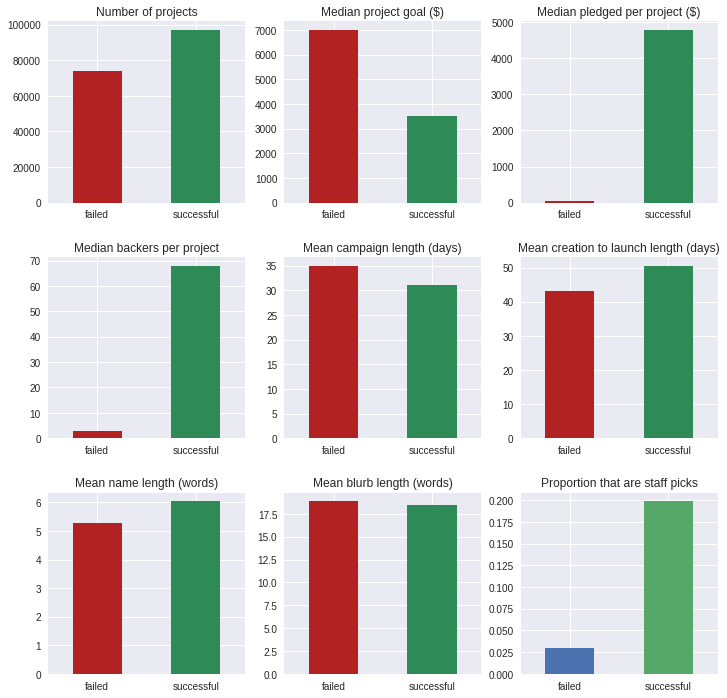

In [65]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

df.groupby('state').campaign_length.mean().plot(kind='bar', ax=ax5, color=['firebrick', 'seagreen'], rot=0)
ax5.set_title('Mean campaign length (days)')
ax5.set_xlabel('')

df.groupby('state').creation_to_launch.mean().plot(kind='bar', ax=ax6, color=['firebrick', 'seagreen'], rot=0)
ax6.set_title('Mean creation to launch length (days)')
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

# Creating a dataframe grouped by staff_pick with columns for failed and successful
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar',color=['C0', 'C1'], ax=ax9, rot=0) 
ax9.set_title('Proportion that are staff picks')
ax9.set_xlabel('')
fig.subplots_adjust(hspace = 0.3)
plt.show()

Text(0, 0.5, 'Percent Staff Picked (%)')

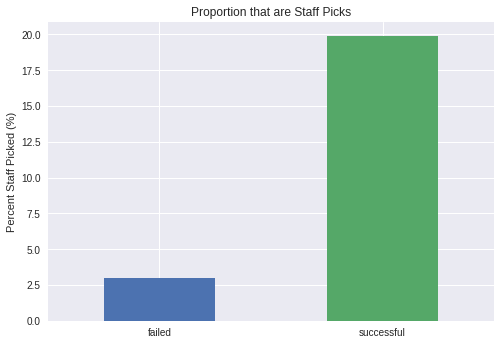

In [66]:
#extra visualization for project
(((pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1])*100).plot(kind='bar',color=['C0', 'C1'], rot=0).set_title("Proportion that are Staff Picks");
plt.ylabel("Percent Staff Picked (%)")

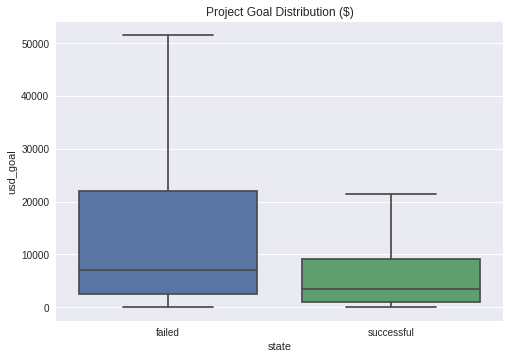

In [67]:
#boxplot for usd_goal column
sns.boxplot(x="state", y="usd_goal", data=df, showfliers=False, order=["failed", "successful"]).set_title('Project Goal Distribution ($)');

Successful projects seem to have lower median project goals, the median amount is about half that of failed projects
The median pledge per project is surprisingly higher for successful projects compared to failed projects. This means that after successful projects meet their goal, they continue to gain funding and can become overfunded.
Successful projects have more backers than failed projects.
Successful projects seem to have slightly shorter campaign lengths, however successful projects take longer to launch.
There is very little difference between the name length and blurb length between successful and failed projects.

### Has fundraising changed over time?

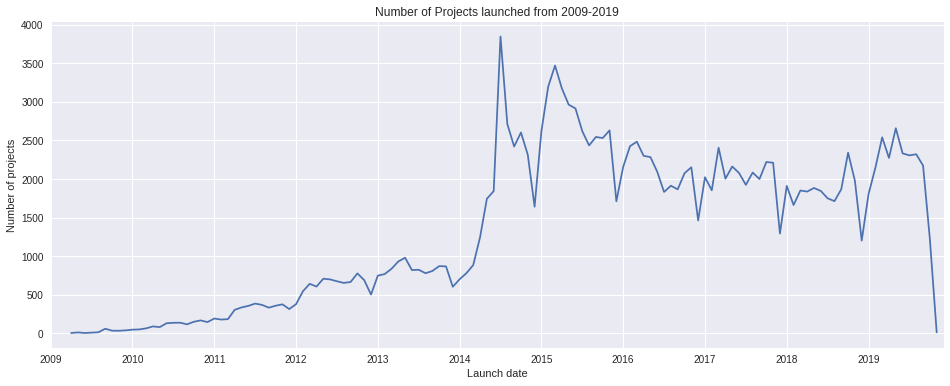

In [68]:
# plot number of projects launched per month
plt.figure(figsize =(16, 6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2009-01-01', '2019-12-01')
plt.xlabel('Launch date')
plt.ylabel('Number of projects')
plt.title('Number of Projects launched from 2009-2019')
plt.show()

From the graph, we can see that is a steady growth from 2009 to 2014. Kickstarter expanded their business into other countries in 2012. Growth increased dramatically in 2014 and has remained at a high level ever since. 

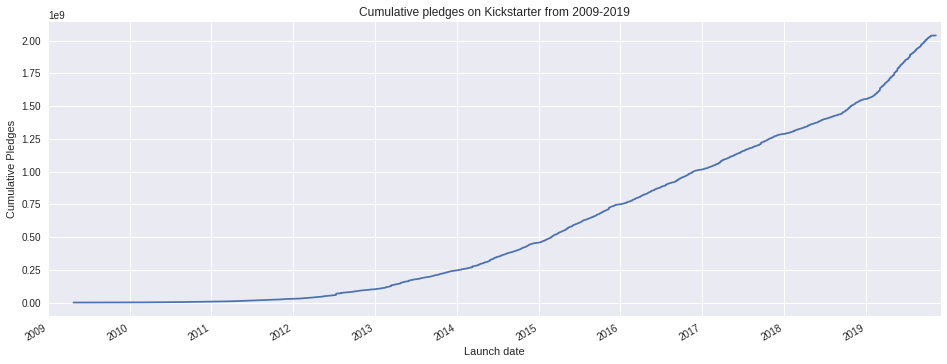

In [69]:
#amount of pledges on Kickstarter
plt.figure(figsize = (16, 6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2019-12-01')
plt.xlabel('Launch date')
plt.ylabel('Cumulative Pledges')
plt.title('Cumulative pledges on Kickstarter from 2009-2019')
plt.show()

In [70]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(), 2))

Average amount pledged per project in each year, in $:
launched_at
2009-01-01     3730.18
2010-01-01     4737.86
2011-01-01     5867.14
2012-01-01     9631.24
2013-01-01    14675.19
2014-01-01     9286.50
2015-01-01     8937.98
2016-01-01    10616.33
2017-01-01    11167.50
2018-01-01    12204.78
2019-01-01    22282.57
Freq: AS-JAN, Name: usd_pledged, dtype: float64


The second graph and the table show a similar trend to the first graph: from 2014 onwards we can see higher variablity in average pledge amounts and lower amounts pledged between 2009-2014

In [71]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched_at
2009-01-01     3993.99
2010-01-01     5220.47
2011-01-01     5953.68
2012-01-01     9188.76
2013-01-01    13269.67
2014-01-01    41620.41
2015-01-01    69087.72
2016-01-01    49746.37
2017-01-01    49533.82
2018-01-01    21888.95
2019-01-01    16906.77
Freq: AS-JAN, Name: usd_goal, dtype: float64


Examing the goal amount per project, we can see that 2009-2013 goals were lower but from 2014 onwards would steadily increase.

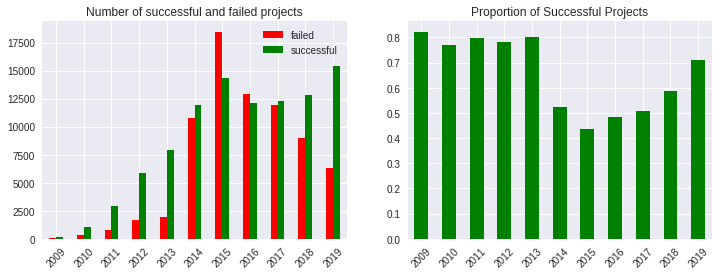

In [72]:
#create a dataframe grouped by year with columns for failed and successful projects
year_df= df.set_index('launched_at').state
year_df = pd.get_dummies(year_df).resample('YS').sum()

fig, ax = plt.subplots(1,2, figsize=(12,4))
year_df.plot.bar(ax=ax[0], color = ['red', 'green'])
ax[0].set_title('Number of successful and failed projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009, 2020)), rotation = 45)

year_df.div(year_df.sum(axis = 1), axis = 0).successful.plot(kind = 'bar', ax = ax[1], color = 'green')
ax[1].set_title('Proportion of Successful Projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2020)), rotation = 45)
plt.show()

Between 2009-2014, there was a higher proportion of successful projects and started to decrease in 2014 but seems to be rising slightly.

### What kinds of projects are successful?

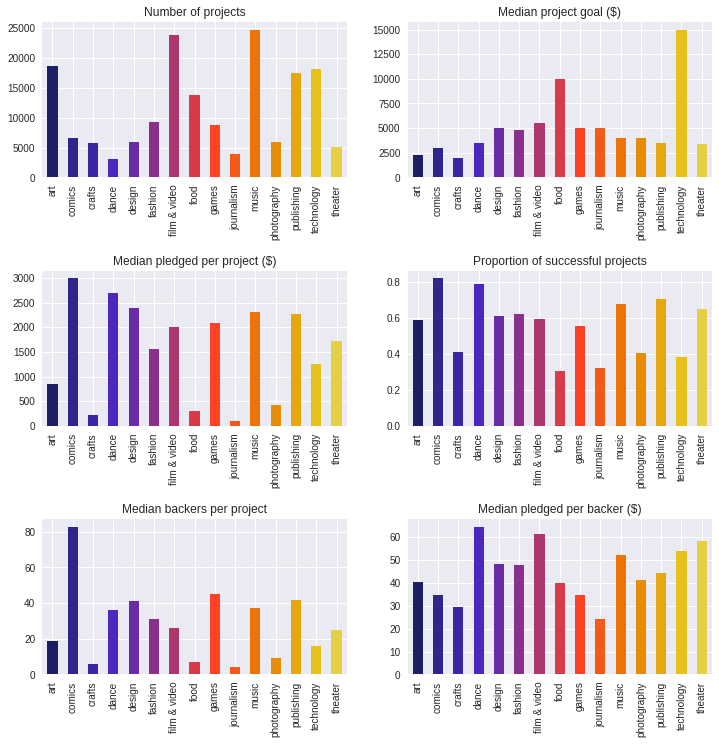

In [73]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('category').backers_count.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('category').plegde_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

Music and film/video projects categories have the highest number projects on Kickstarter but comics and dance projects have the highest proportion of successful projects than any other category (with music and film following closely behind). Unsurprisingly, the technology category has the highest median project goals but comics have the highest median backer per project and median pledged per project followed closely by dance projects. I would like to inspect the success of art and comic projects closely to see if the differences being observed are actually statistically significant. In order to do this, I will perform a chi-squared test.

In [74]:
#chi-squared test for dance projects
art_projects = cat_df.loc[cat_df.index == 'dance']
non_art_projects = cat_df.loc[cat_df.index != 'dance'].sum()
art_cont_table = np.array([[2384.0, 94531.0], [633.0, 73534.0]])
stat, p, dof, expected = chi2_contingency(art_cont_table)
print('P-value: ', p)
prob = 0.95
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0) for dance projects')
else:
    print('Independent (fail to reject H0) for dance projects')

#chi-squared test for comics projects
comics_projects = cat_df.loc[cat_df.index == 'comics']
non_comics_projects = cat_df.loc[cat_df.index != 'comics'].sum()
comics_cont_table = np.array([[5441.0, 91474.0], [1180.0,72987.0]])
stat, p, dof, expected = chi2_contingency(comics_cont_table)
prob = 0.95
print('P-value: ', p)
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0) for comics projects')
else:
    print('Independent (fail to reject H0) comics projects')

P-value:  6.376418568502995e-138
Dependent (reject H0) for dance projects
P-value:  0.0
Dependent (reject H0) for comics projects


### where are project creators from and where are the successful projects originating from?

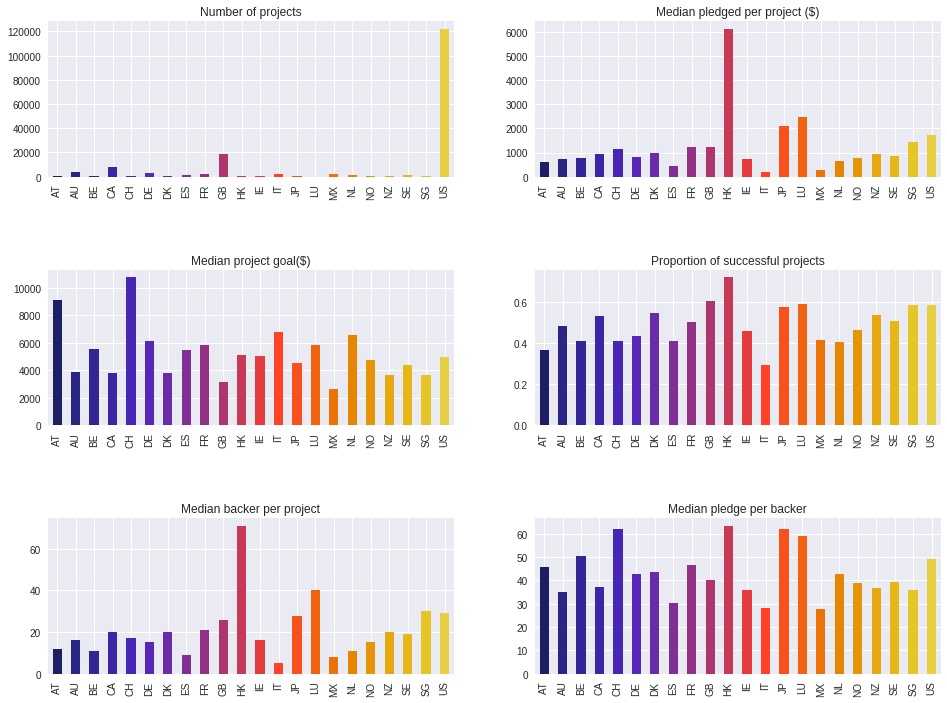

In [75]:
#create a new dataframe for countries with columns for failed and successful projects
country_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()
#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16,12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.country.nunique()))

df.groupby('country').country.count().plot(kind = 'bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('country').usd_pledged.median().plot(kind = 'bar', ax=ax2, color=color)
ax2.set_title('Median pledged per project ($)')
ax2.set_xlabel('')

df.groupby('country').usd_goal.median().plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median project goal($)')
ax3.set_xlabel('')

country_df.div(country_df.sum(axis = 1), axis = 0).successful.plot(kind='bar', ax=ax4, color=color)
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')

df.groupby('country').backers_count.median().plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median backer per project')
ax5.set_xlabel('')

df.groupby('country').plegde_per_backer.median().plot(kind = 'bar', ax=ax6, color=color)
ax6.set_title('Median pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

A large majority of the number of projects come out of the United States, with 6x the total number of projects compared to the United Kingdom(which was second). China has the highest median project goals.
Projects from Hong Kong are most successful with highest proportion of successful projects, highest median backers per project, highest median pledged per project. I would like to inspect the proportion of successful projects coming out of Hong Kong and see if this difference is statistically significant or not. In order to do this, I will be performing a Chi-Squared contingency test, which works well on categorical variables. The null hypothesis is that there is no difference between the rate of success projects and the the project originating in Hong Kong. The alternative hypothesis is that there is significant difference between the rate of success of a project originating in Hong Kong.

In [76]:
hk_projects = country_df.loc[country_df.index == 'HK'].sum()
non_hk_projects = country_df.loc[country_df.index !='HK'].sum()
contingency_table = np.array([[583.0, 96332.0], [227.0, 73940.0]])
#chi-squared test
stat, p, dof, expected = chi2_contingency(contingency_table)
prob = 0.95
print('P-value: ', p)
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

P-value:  1.5246578563128458e-18
Dependent (reject H0)


Looking at the chi-squared test performed above, we can see that the null hypothesis was rejected and the alternative hypothesis was accepted, meaning that the results we are seeing are statisitcally significant.

### when is the best time to launch a project?

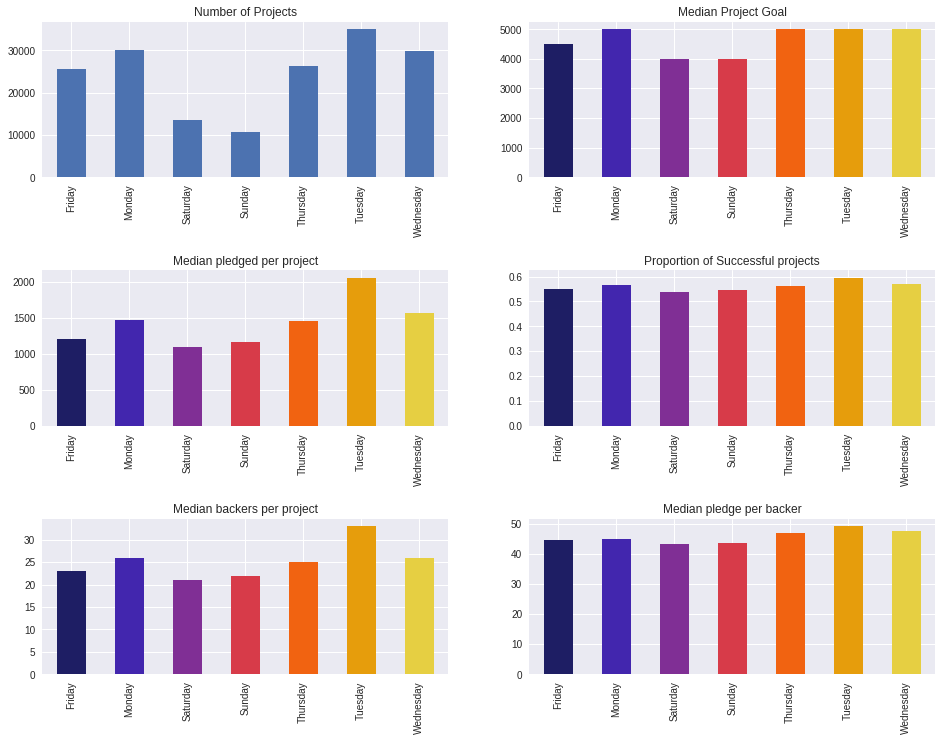

In [77]:
#create a dataframe grouped by day of project launch, with columns for failed and successful projects
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()

#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_day.nunique()))

df.groupby('launch_day').launch_day.count().plot(kind = 'bar', ax=ax1)
ax1.set_title('Number of Projects')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().plot(kind = 'bar', ax=ax2, color = color)
ax2.set_title('Median Project Goal')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis = 1), axis = 0).successful.plot(kind = 'bar', ax=ax4, color = color)
ax4.set_title('Proportion of Successful projects')
ax4.set_xlabel('')

df.groupby('launch_day').backers_count.median().plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('launch_day').plegde_per_backer.median().plot(kind= 'bar', ax=ax6, color=color)
ax6.set_title('Median pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

Tuesday looks like the most popular day to launch a project, it has the highest number of projects launched, highest backers per project, highest median pledge per project. On the other hand, the weekends(esp. Friday) are the least popular days to launch a project, attracts less money, have less backers and recieve the smallest pledges per backer. This is surprising because they also tend to have smaller goals but tend recieve less funding and are less successful.

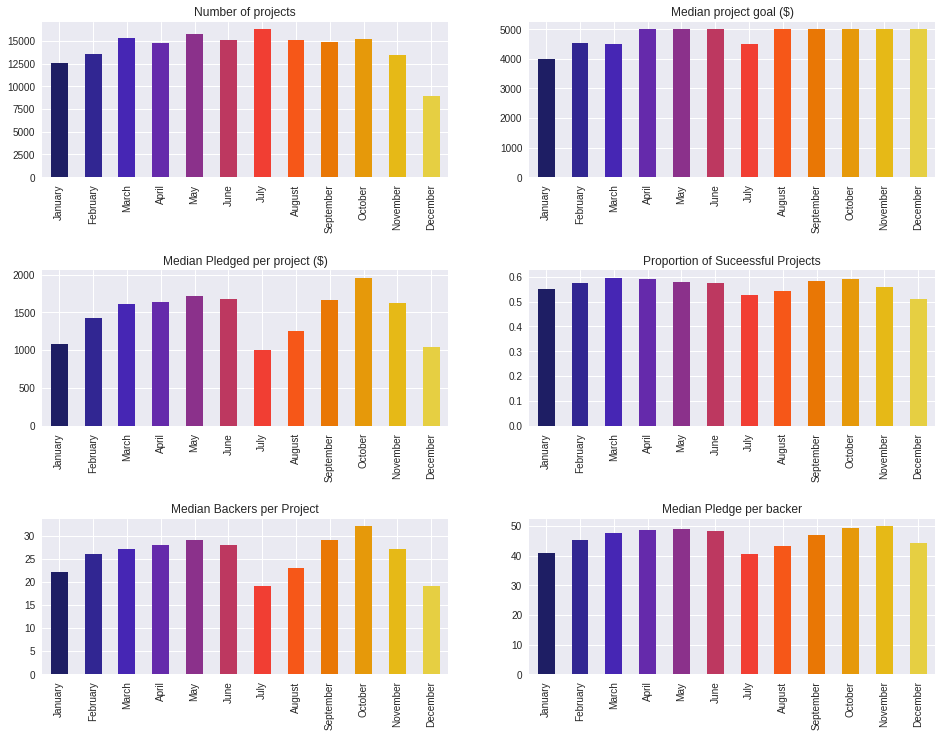

In [78]:
#create a dataframe for launch month, with columns for failed and successful projects
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_month.nunique()))
months = list(calendar.month_name)[1:]

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind = 'bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind = 'bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind = 'bar', ax=ax3, color=color)
ax3.set_title('Median Pledged per project ($)')
ax3.set_xlabel('')

month_df.div(month_df.sum(axis = 1), axis = 0).successful.reindex(months).plot(kind = 'bar', ax=ax4, color=color)
ax4.set_title('Proportion of Suceessful Projects')
ax4.set_xlabel('')

df.groupby('launch_month').backers_count.median().reindex(months).plot(kind = 'bar', ax=ax5, color=color)
ax5.set_title('Median Backers per Project')
ax5.set_xlabel('')

df.groupby('launch_month').plegde_per_backer.median().reindex(months).plot(kind = 'bar', ax=ax6, color=color)
ax6.set_title('Median Pledge per backer')
ax6.set_xlabel('')

fig.subplots_adjust(hspace = 0.6)
plt.show()

July is the most popular month to launch a project and December is the least popular time to launch a project. Both of these months have lowest success rates, lowest median backers per project, lowest pledge amounts and lowest pledges per backer.
Median goal sizes are all about the same expect for projects launched in January.
It looks like October is the best time to launch a project, it has: the highest amount of median backers per project, highest median pledge value per project. November seems to have the highest median pledge per backer.

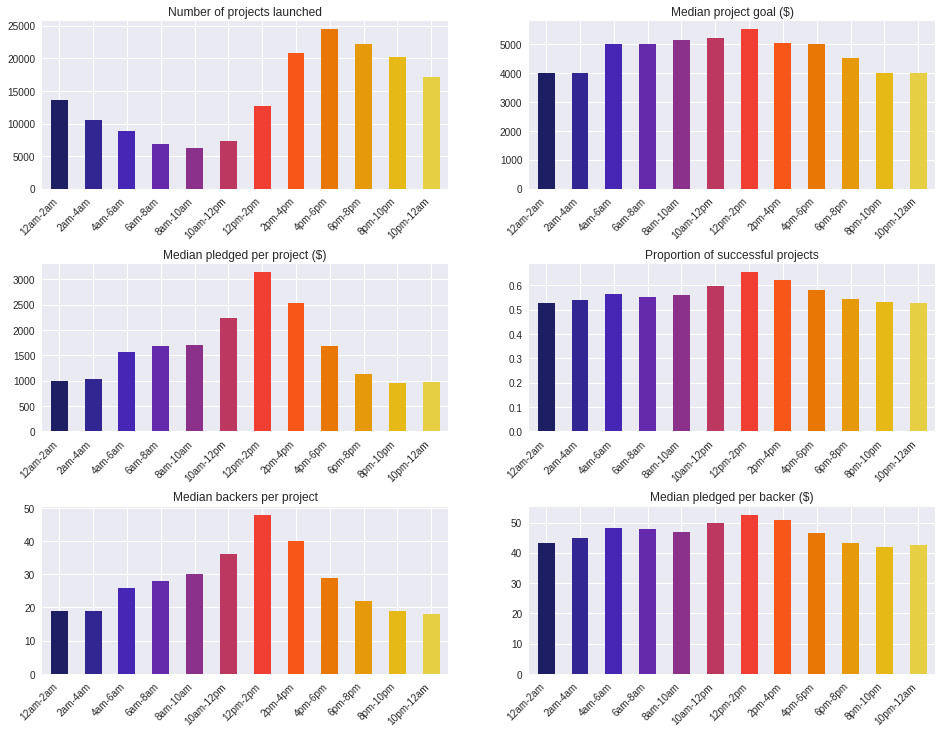

In [79]:
#create a dataframe grouped by launch time, with columns for failed and successful projects
time_df = pd.get_dummies(df.set_index('launch_time').state).groupby('launch_time').sum()

#plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(16, 12))
color = cm.CMRmap(np.linspace(0.1, 0.8, df.launch_time.nunique()))

times = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

df.groupby('launch_time').launch_time.count().reindex(times).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_goal.median().reindex(times).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_pledged.median().reindex(times).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

time_df.div(time_df.sum(axis=1), axis=0).successful.reindex(times).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Proportion of successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_time').backers_count.median().reindex(times).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_time').plegde_per_backer.median().reindex(times).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.45)
plt.show()

The most popular time to launch a project is between 4pm-6pm with 2pm-4pm being a close second (these times equate to being around 9am-11am EST and 11am-1pm EST because the times above are in UTC/GMT).
Surprisingly, the median project goal per project and proportion of successful projects vary throughout the day. Projects launched between 12pm-2pm (7am-9am EST) tend to attract more backers, pledge amounts, pledge per backer.

### checking distributions

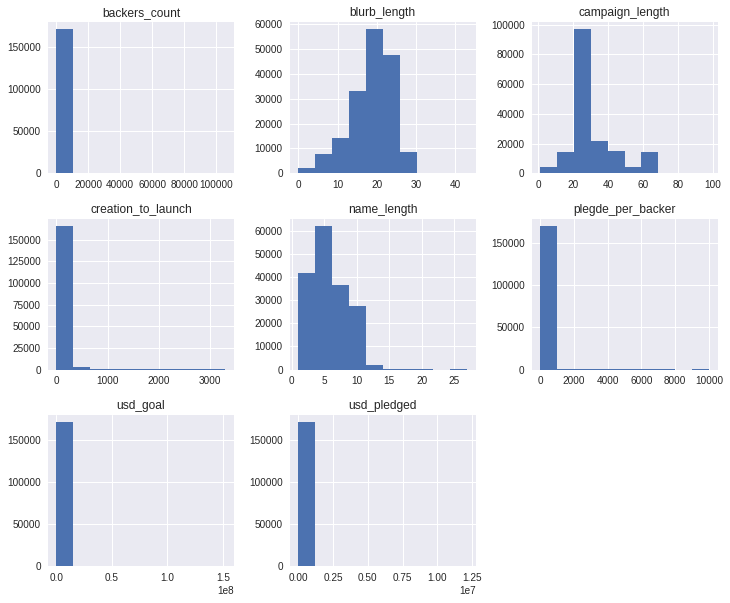

In [80]:
df[df.describe().columns].hist(figsize=(12,10));

Most of the continous numerical features, like blurb_length and campaign_length are positively skewed. Name_length seems to be negatively skewed. Since this is not an issue for machine learning models, these features will be kept as is and log-transformed in the first few models. Afterwards, the models will be rerun with log-transformed features to see that improves model performance.

### Prepping data for machine learning

Some of the features were kept for EDA purposes, but now need to be removed in order to create machine learning models. These features include datetime columns, features related to the outcome (e.g. the amount pledged and number of backers) rather than properties of the project itself(goal, category). Categorical features that would result in too many one-hot encoded features are also being removed. 

In [81]:
new_df = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category',
                 'plegde_per_backer'], axis = 1)
new_df.head()

,category,country,country_displayable_name,staff_pick,state,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
id,,,,,,,,,,,,,,,,
217900996,crafts,US,the United States,False,successful,15.0,2000.0,8,4,31,Saturday,Tuesday,December,January,2pm-4pm,4am-6am
1553472644,publishing,US,the United States,True,successful,13.0,5000.0,7,6,32,Sunday,Thursday,March,May,10pm-12am,12pm-2pm
1264567501,film & video,US,the United States,False,failed,19.0,30000.0,6,7,30,Tuesday,Thursday,June,July,6pm-8pm,6pm-8pm
630840081,fashion,US,the United States,False,successful,19.0,1700.0,8,1119,60,Tuesday,Saturday,November,January,4am-6am,4am-6am
1685109824,journalism,US,the United States,False,successful,24.0,20500.0,4,8,14,Monday,Tuesday,April,April,10pm-12am,4am-6am


In [82]:
len(new_df)

171082

Now, multicollinearity needs to be checked for assessing correlations between the predictor features, as this can cause some issues in our model.

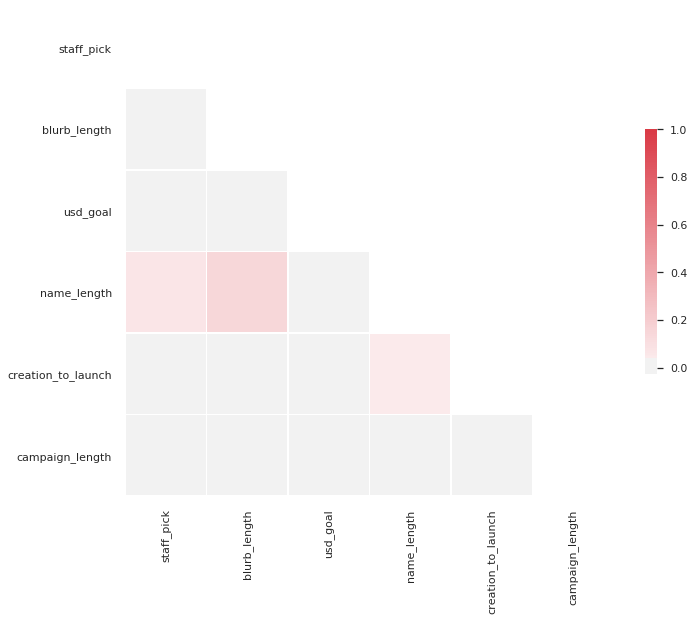

In [83]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = new_df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [84]:
corr

,staff_pick,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length
staff_pick,1.000000,-0.004863,-0.006662,0.067256,0.041652,-0.025515
blurb_length,-0.004863,1.000000,-0.001141,0.147125,0.003553,0.027063
usd_goal,-0.006662,-0.001141,1.000000,-0.005835,0.002203,0.024597
name_length,0.067256,0.147125,-0.005835,1.000000,0.046568,-0.023034
creation_to_launch,0.041652,0.003553,0.002203,0.046568,1.000000,0.023958
campaign_length,-0.025515,0.027063,0.024597,-0.023034,0.023958,1.000000


The correlation matrix shows that there are no issues with multicollinearity. Now, the dependent variable will be converted into 1s (successful) and 0s (failed).

In [85]:
new_df['state'] = new_df['state'].replace({'failed': 0, 'successful': 1})

In [86]:
#Converting boolean features into strings to include in one-hot encoding
new_df['staff_pick'] = new_df['staff_pick'].astype('str')

In [87]:
new_df = pd.get_dummies(new_df)

Finally, the dependent (y) and independent (X) features will be separated into two different data sets. Because the features are on different scales, the independent features will be scaled and normalized using StandardScaler.

In [88]:
X_unscaled = new_df.drop('state', axis = 1)
y = new_df.state

In [89]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.701501,-0.034214,0.853394,-0.326827,-0.147868,-0.349459,-0.200646,5.389435,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
1,-1.084795,-0.031468,0.481925,-0.311763,-0.064180,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,3.982506,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
2,0.065087,-0.008583,0.110456,-0.304231,-0.231556,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,2.790431,-0.182356,-0.35111
3,0.065087,-0.034489,0.853394,8.071304,2.279083,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
4,1.023322,-0.017280,-0.632482,-0.296699,-1.570564,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111


# Modeling

In this section, several machine learning models for classification will be applied to the data, in order to create a model to classify projects as successes or failures. 
Becuase the two categories are about the same size, no measures will be taken to adjust imbalanced classes (like SMOTE)

In [90]:
#split the target and features into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Now it's a good time to pick a metric to analyze how well the models have performance. For this project, I have chosen the F1 weighted average was chosen. The F1 score calculates the harmonic mean between recall and precision, and this measure does not give any preference to false positives or false negaitives (which would be bad in this case). The weighted average will be used because the two classes are about the same size, and we want to predict both successes and failures.

### Model: Basic Logistic regression

Logisitic regression can be used as a binary classifier in order to predict which category a data point falls into. First, we will create a baseline model to improve upon, with default parameters.

In [91]:
#create a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
#make predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [93]:
# Logistic regression scores
print('Logistic regression score for train set: ', round(logreg.score(X_train, y_train),5))
print('Logistic regression score for test set: ', round(logreg.score(X_test, y_test), 5))
print('\nClassification report:')
print(classification_report(y_test, y_hat_test))

Logistic regression score for train set:  0.71597
Logistic regression score for test set:  0.7171

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64     22185
           1       0.72      0.82      0.77     29140

    accuracy                           0.72     51325
   macro avg       0.72      0.70      0.70     51325
weighted avg       0.72      0.72      0.71     51325



In [94]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

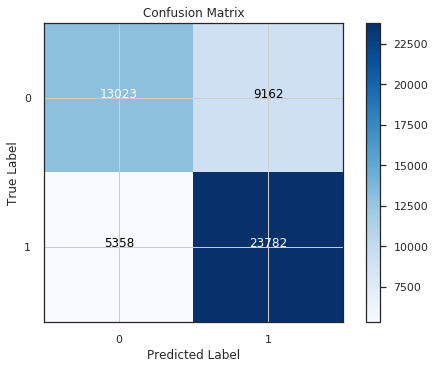

In [95]:
#Confusion matrix
plot_cf(y_test, y_hat_test)

AUC:  0.78211


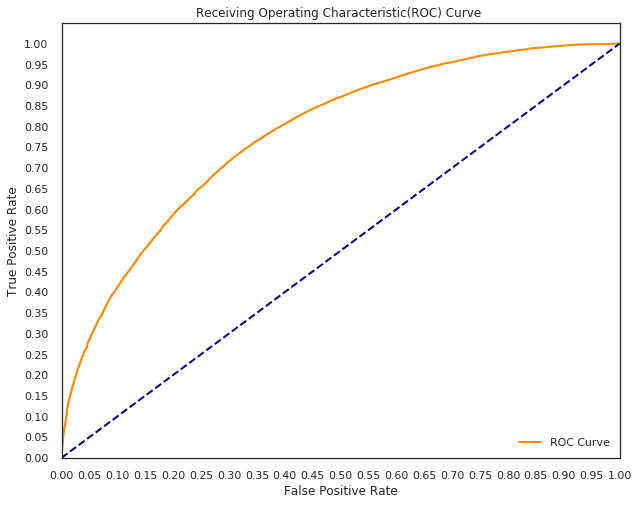

In [96]:
#Plot ROC-AUC curve
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC: ',round(auc(fpr, tpr), 5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
        lw=lw, label= 'ROC Curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle = '--')
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiving Operating Characteristic(ROC) Curve ')
plt.legend(loc = 'lower right')
plt.show()

From above, we can see that the model has a fairly good accuracy score of 0.68 (averaged weighed f1 score), with similar scores for both train set and test set. However, the model does not seem to be able to predict failures well compared to the successes, and the recall rate (ability to predict positives out all the actual positives in a data set) are notably different for successes and failures. The AUC curve is high and being pulled to the top left section of the graph, which is a good sign. However, we can probably improve upon this.

In [97]:
len(X.columns)

128

### Principal Component Analysis and feature weightings

There are a large number of features in this data set(128). PCA (Prinicipal Components Analysis) can be used to reduce this into a smaller number of features which will still explain as much variation as possible.

In [98]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

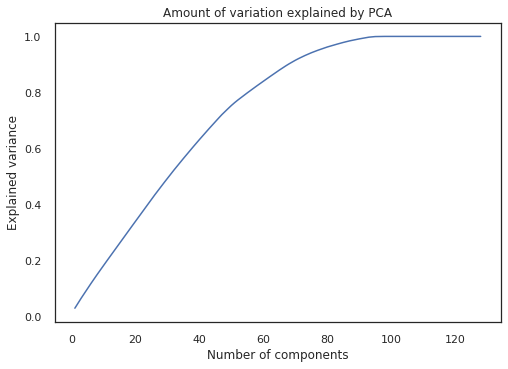

In [99]:
#plotting the amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

From the graph, there looks to be an elbow at about 80 components, but this will be checked below.

In [100]:
print("Number of components explaining 80% of variance: ", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance: ", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance: ", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance:  55
Number of components explaining 90% of variance:  67
Number of components explaining 99% of variance:  89


The number of components to be used used will be assessed by running logistic regression models using each of these three number of components.

In [101]:
n_comps = [55, 67, 89]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components = n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print('\nNumber of components: ', n)
    print('\nScore:', round(pipe.score(X_test, y_test),5))


Number of components:  55

Score: 0.67028

Number of components:  67

Score: 0.69467

Number of components:  89

Score: 0.71595


The above results show us that the score is highest for 89 components

In [102]:
#feature weightings
pca = PCA(n_components = 89)
pca.fit_transform(X)
pca_89_comps = pd.DataFrame(pca.components_, columns = X.columns).T
pca_89_comps['mean_weight'] = pca_89_comps.iloc[:].abs().mean(axis = 1)
pca_89_comps.sort_values('mean_weight', ascending = False)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,mean_weight
launch_time_2am-4am,-0.077201,0.113434,0.007619,0.050675,-0.012874,-0.098888,0.057750,-0.002111,0.003153,0.014337,...,0.023594,-0.013724,0.227856,-0.009239,0.148500,-0.127954,-0.120123,-0.131868,0.121990,0.060266
deadline_time_2am-4am,-0.098499,0.078334,0.027829,0.040093,-0.013162,-0.124823,0.067146,0.005185,-0.014561,0.001378,...,-0.023288,0.010069,-0.225193,0.009815,-0.146236,0.127238,0.112404,0.122652,-0.113657,0.059205
launch_time_4am-6am,-0.054753,0.109698,0.031920,0.064662,0.044851,-0.027446,0.038223,0.043367,0.019120,0.011816,...,0.218510,-0.030570,0.276745,0.026094,0.104034,-0.112203,-0.051416,-0.104637,0.047300,0.055837
deadline_month_February,-0.009583,0.081359,-0.136517,0.032450,0.073527,0.111492,0.004302,-0.049977,0.169669,-0.019934,...,-0.006301,-0.128395,-0.042668,0.211467,0.021464,-0.008049,0.003117,-0.006958,-0.008986,0.054736
launch_month_January,-0.011793,0.081742,-0.150705,0.033404,0.080044,0.110558,0.018897,-0.068218,0.186072,-0.033412,...,0.011904,0.081453,0.033069,-0.217546,-0.022323,0.004018,0.000424,0.006838,0.003072,0.054706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_displayable_name_Belgium,0.043074,0.025399,0.033786,0.011489,-0.010988,0.074416,0.040340,-0.054839,-0.021410,-0.035117,...,-0.000686,0.000607,-0.002742,0.001144,-0.001495,0.002386,0.000827,0.002494,0.001840,0.029508
country_displayable_name_Luxembourg,0.014677,0.006241,0.006445,0.000867,-0.022414,0.035609,-0.041374,0.018064,-0.058776,0.044945,...,-0.001315,-0.001098,0.000578,-0.000375,-0.003026,0.001198,0.002330,-0.000688,0.001568,0.025802
country_LU,0.014677,0.006241,0.006445,0.000867,-0.022414,0.035609,-0.041374,0.018064,-0.058776,0.044945,...,-0.001315,-0.001098,0.000578,-0.000375,-0.003026,0.001198,0.002330,-0.000688,0.001568,0.025802
country_US,-0.492346,-0.082269,0.021851,0.054613,-0.033138,0.050466,-0.013389,-0.028553,-0.010398,0.002642,...,0.005255,-0.001477,0.016246,0.001388,0.008859,-0.013394,-0.002939,-0.013099,-0.006576,0.017423


In [103]:
pca_89_comps[0].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_displayable_name_the United States     0.492346
country_US                                     0.492346
country_GB                                     0.308141
country_displayable_name_the United Kingdom    0.308141
deadline_time_10am-12pm                        0.144721
launch_time_8am-10am                           0.135044
launch_time_10am-12pm                          0.134032
country_CA                                     0.129800
country_displayable_name_Canada                0.129800
deadline_time_8am-10am                         0.123789
Name: 0, dtype: float64

In [104]:
pca_89_comps[1].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_displayable_name_the United Kingdom    0.312863
country_GB                                     0.312863
country_displayable_name_Australia             0.268261
country_AU                                     0.268261
country_displayable_name_Canada                0.243664
country_CA                                     0.243664
staff_pick_False                               0.177156
staff_pick_True                                0.177156
launch_time_12am-2am                           0.163642
deadline_time_12am-2am                         0.148254
Name: 1, dtype: float64

In [105]:
pca_89_comps[2].map(lambda x: x).abs().sort_values(ascending = False)[:10]

country_GB                                     0.223944
country_displayable_name_the United Kingdom    0.223944
launch_time_2pm-4pm                            0.207867
country_displayable_name_Hong Kong             0.200434
country_HK                                     0.200434
deadline_time_2pm-4pm                          0.193159
staff_pick_True                                0.192401
staff_pick_False                               0.192401
deadline_month_October                         0.186951
launch_month_September                         0.185945
Name: 2, dtype: float64

The tables show the top 10 most important features in the top three most important components.
1. Component 1: the top two features the country the project orginate (the United States) <br>
2. Component 2: the second prominent country where projects originate (the UK) <br>
3. Component 3: relate to the deadline month and the launch month of projects <br>

## Model: Logistic Regression with PCA and parameter optimization

The logistic regression model will be improved by parameter optimization. GridSearchCV can be used to test different combinations of parameters like regularization parameters (values of C), penalties (l1 or l2) and with or without intercepts.

In [107]:
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components = 89)), ('clf', LogisticRegression())])

params_logreg = [{'clf__penalty': ['l1', 'l2'],
                 'clf__fit_intercept': [True, False],
                 'clf__C': [0.001, 0.01, 1, 10]}]
grid_logreg = GridSearchCV(estimator = pipe_logreg, param_grid = params_logreg, 
                          cv = 5)
grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Time taken to run: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Best accuracy:", round(logreg_best_score,2))
print("Best parameters:", logreg_best_params)

/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/

/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/home/hazel/anaconda3/

Time taken to run: 2.2 minutes
Best accuracy: 0.71
Best parameters: {'clf__C': 10, 'clf__fit_intercept': True, 'clf__penalty': 'l2'}


### Best logistic regression model

Logistic regression score for train set:  0.71562
Logistic regression score for test set:  0.7164

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.58      0.64     22185
           1       0.72      0.82      0.77     29140

    accuracy                           0.72     51325
   macro avg       0.71      0.70      0.70     51325
weighted avg       0.72      0.72      0.71     51325



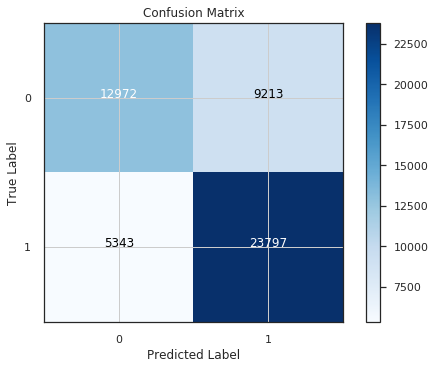

In [108]:
best_logreg = Pipeline([('pca', PCA(n_components = 89)), 
                       ('clf', LogisticRegression(C = 10, fit_intercept = True, penalty= 'l2'))])
best_logreg.fit(X_train, y_train)
lr_y_hat_train = best_logreg.predict(X_train)
lr_y_hat_test = best_logreg.predict(X_test)

print("Logistic regression score for train set: ", round(best_logreg.score(X_train, y_train),5))
print("Logistic regression score for test set: ", round(best_logreg.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

After hyperparameter tuning, the logistic regression performs just as well as the baseline logistic regression model.

### Model: Random Forest

The random forest model is a supervised learning algorithm that can be used for classification. It works by building multiple decision trees to predict which category a data point belongs to.

In [110]:
#build a random forest classifier with default parameters
pipe_rf = Pipeline([('pca', PCA(n_components = 89)), ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print('Random Forest score: ', round(pipe_rf.score(X_test, y_test),5))

Random Forest score:  0.69268


In [111]:
#Finding max tree depths of each tree 
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[47,
 51,
 53,
 56,
 53,
 58,
 57,
 49,
 48,
 45,
 47,
 58,
 47,
 54,
 54,
 51,
 59,
 54,
 50,
 48,
 52,
 48,
 57,
 51,
 44,
 49,
 64,
 55,
 51,
 57,
 46,
 47,
 45,
 46,
 52,
 49,
 54,
 50,
 43,
 42,
 45,
 45,
 51,
 51,
 53,
 58,
 46,
 54,
 45,
 49,
 48,
 55,
 65,
 46,
 55,
 52,
 57,
 46,
 52,
 60,
 50,
 55,
 51,
 46,
 58,
 48,
 60,
 47,
 56,
 45,
 52,
 54,
 46,
 45,
 46,
 46,
 49,
 50,
 51,
 52,
 48,
 48,
 46,
 51,
 50,
 47,
 57,
 51,
 58,
 60,
 51,
 58,
 48,
 48,
 54,
 53,
 55,
 49,
 64,
 51]

In [112]:
#use Gridsearch CV to find different parameters
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components = 89)),
                   ('clf', RandomForestClassifier())])
params_rf = [
    {'clf__n_estimators': [100],
    'clf__max_depth': [20,30,40],
    'clf__min_samples_split': [0.001, 0.01]}]
grid_rf = GridSearchCV(estimator = pipe_rf,
                      param_grid = params_rf,
                      cv = 5)
grid_rf.fit(X_train, y_train)

rf_end = time.time()
rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end-rf_start)/60,2)} minutes")
print("Best accuracy: ", round(rf_best_score, 2))
print("Best parameters: ", rf_best_params)

Time taken to run: 39.79 minutes
Best accuracy:  0.7
Best parameters:  {'clf__max_depth': 40, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 100}


Random Forest score for training set:  0.78638
Random Forest score for testing set:  0.7027

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.57      0.62     22185
           1       0.71      0.81      0.76     29140

    accuracy                           0.70     51325
   macro avg       0.70      0.69      0.69     51325
weighted avg       0.70      0.70      0.70     51325



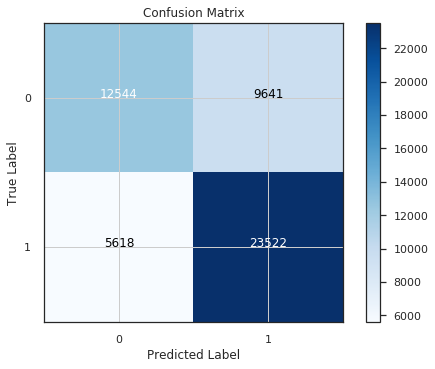

In [113]:
#run best random forest model with parameters from above
best_rf = Pipeline([('pca', PCA(n_components = 89)),
                   ('clf', RandomForestClassifier(max_depth = 40, min_samples_split = 0.001, n_estimators = 100))])
best_rf.fit(X_train, y_train)

rf_y_hat_train = best_rf.predict(X_train)
rf_y_hat_test = best_rf.predict(X_test)

print("Random Forest score for training set: ", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for testing set: ", round(best_rf.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)

After hyperparameter tuning, the accuracy of our model increased from 0.65 to 0.70 (weighed average f1 score). However, the difference in score between the training and testing set may point to over-fitting.

### Model : XGBoost

XGBoost is a type of gradient boosting algorithm. Similar to random forest, it is an ensemble algorithm that creates multiple decision trees, but with the help of gradient descent. Using gradient descent this way helps improve the model's performance by being able to classify data points that are difficult to classify.

In [114]:
#default XGBoost model 
pipe_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier())])
pipe_xgb.fit(X_train, y_train)
print('XGBoost score: ', round(pipe_xgb.score(X_test, y_test), 5))

/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost score:  0.7027


In [115]:
#use GridSearchCV to find different hyperparameters
xgb_start = time.time()

pipe_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier())])
params_xgb = [
    {'clf__n_estimators': [100],
    'clf__max_depth': [6, 10], 
    'clf__learning_rate': [0.1],
    'clf__min_child_weight': [1,3,5]}
]
grid_xgb = GridSearchCV(estimator= pipe_xgb, 
                       param_grid = params_xgb, 
                       cv = 5)
grid_xgb.fit(X_train, y_train)

xgb_end = time.time()
xgb_best_score = grid_xgb.best_score_
xgb_best_params = grid_xgb.best_params_
print(f"Time taken to run: {round((xgb_end-xgb_start)/60,1)} minutes.")
print("Best accuracy: ", round(xgb_best_score, 2))
print("Best parameters: ", xgb_best_params)

/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:57:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:59:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:03:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:05:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:07:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:08:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:12:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:23:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:25:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:27:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:34:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:40:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:42:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:44:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:46:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken to run: 52.3 minutes.
Best accuracy:  0.7
Best parameters:  {'clf__learning_rate': 0.1, 'clf__max_depth': 6, 'clf__min_child_weight': 5, 'clf__n_estimators': 100}


/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:51:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost score for training set:  0.73617
XGBoost score for testing set:  0.70396

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.59      0.63     22185
           1       0.72      0.79      0.75     29140

    accuracy                           0.70     51325
   macro avg       0.70      0.69      0.69     51325
weighted avg       0.70      0.70      0.70     51325



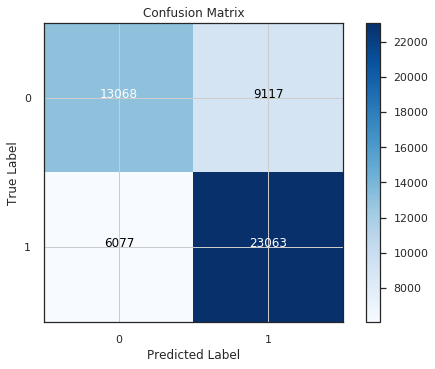

In [116]:
#best xgboost model
best_xgb = Pipeline([('pca', PCA(n_components = 89)),
                    ('clf', xgb.XGBClassifier(learning_rate = 0.1, max_depth = 6, min_child_weight = 5, n_estimators = 100,
                                             subsample = 0.7))])
best_xgb.fit(X_train, y_train)
xgb_y_hat_train = best_xgb.predict(X_train)
xgb_y_hat_test = best_xgb.predict(X_test)

print("XGBoost score for training set: ", round(best_xgb.score(X_train, y_train),5))
print("XGBoost score for testing set: ", round(best_xgb.score(X_test, y_test),5))
print("\nClassification Report")
print(classification_report(y_test, xgb_y_hat_test))
plot_cf(y_test, xgb_y_hat_test)

After hyperparameter tuning, the model's accuracy increased from 0.69 to 0.70, this is a small increase for a computionally intensive process like hyperparameter tuning. There also appears to be some overfitting from the difference between the training and testing set.

### Model: Logistic Regression with log-transformation

Previously, we ran a baseline logistic regression model without log transforming the positively skewed features. Now a log transformation will be applied to these features  to see if it improves the performance of the model.

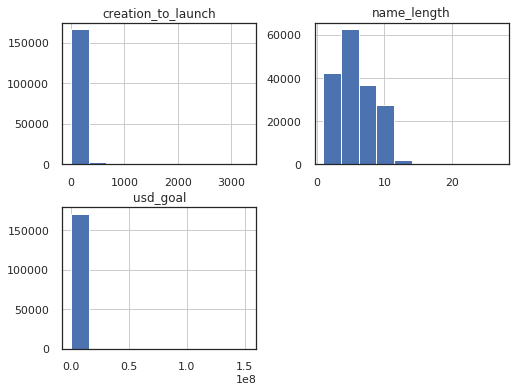

In [117]:
#assess the skewed features
cols_to_transform = ['creation_to_launch', 'name_length', 'usd_goal']
new_df[cols_to_transform].hist(figsize=(8,6));

In [118]:
#replace 0s with 0.01s and log transform
for col in cols_to_transform:
    new_df[col] = new_df[col].astype('float64').replace(0.0,0.01)
    new_df[col] = np.log(new_df[col])

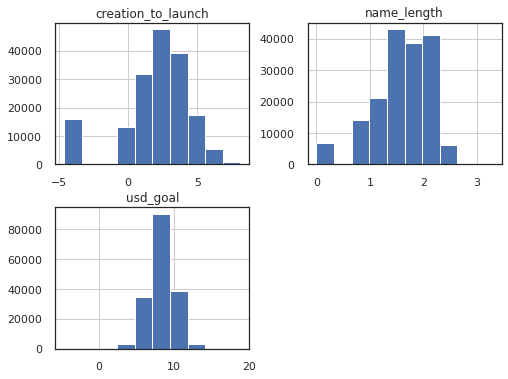

In [119]:
#check new distributions
new_df[cols_to_transform].hist(figsize=(8,6));

In [120]:
new_df.head()

,state,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,category_art,category_comics,category_crafts,category_dance,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
id,,,,,,,,,,,,,,,,,,,,,
217900996,1,15.0,7.600902,2.079442,1.386294,31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1553472644,1,13.0,8.517193,1.945910,1.791759,32,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1264567501,0,19.0,10.308953,1.791759,1.945910,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
630840081,1,19.0,7.438384,2.079442,7.020191,60,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1685109824,1,24.0,9.928180,1.386294,2.079442,14,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Now, the data can be prepared for machine learning modelling again

In [121]:
X_unscaled_log = new_df.drop('state', axis = 1)
y_log = new_df.state

In [122]:
#scale transformed data
scaler = StandardScaler()
X_log = pd.DataFrame(scaler.fit_transform(X_unscaled_log), columns = list(X_unscaled_log.columns))
X_log.head()

,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.701501,-0.453015,0.831305,-0.227219,-0.147868,-0.349459,-0.200646,5.389435,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
1,-1.084795,0.076934,0.599445,-0.070890,-0.064180,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,3.982506,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
2,0.065087,1.113223,0.331783,-0.011456,-0.231556,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,2.790431,-0.182356,-0.35111
3,0.065087,-0.547010,0.831305,1.944961,2.279083,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
4,1.023322,0.892998,-0.372254,0.040028,-1.570564,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111


In [123]:
#split into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.3, random_state = 123)

Logistic regression scores for training set:  0.73644
Logistic regression score for test set:  0.73539

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.64      0.68     22185
           1       0.75      0.81      0.78     29140

    accuracy                           0.74     51325
   macro avg       0.73      0.72      0.73     51325
weighted avg       0.73      0.74      0.73     51325



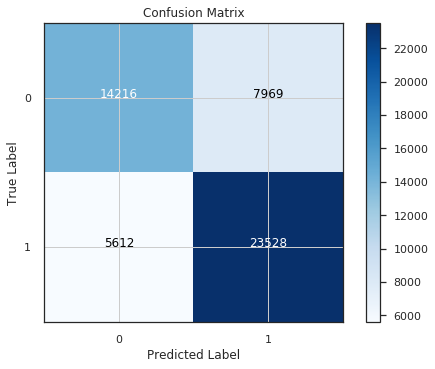

In [124]:
#fit logistic regression with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#make predictions
lr_y_hat_train2 = logreg.predict(X_train)
lr_y_hat_test2 = logreg.predict(X_test)

#logistic regression scores
print("Logistic regression scores for training set: ", round(logreg.score(X_train, y_train), 5))
print("Logistic regression score for test set: ", round(logreg.score(X_test, y_test), 5))
print("\nClassification Report")
print(classification_report(y_test, lr_y_hat_test2))
plot_cf(y_test, lr_y_hat_test2)

Log-transforming the data increased the accuracy by 0.02 from 0.71 to 0.73 and got slightly better at predicting failures (from 0.59 to 0.65)

### Model: Random Forest without PCA

A random forest model will be created with log-transformed data but without PCA. This way a features importance list can be created.

In [125]:
#use GridsearchCV to test multiple parameters
rf_start2 = time.time()

rf2 = RandomForestClassifier(min_samples_split = 0.001, verbose = 2)
params_rf2 = [{'n_estimators': [200, 400],
               'max_depth': [20, 35] 
}]

grid_rf2 = GridSearchCV(estimator = rf2, param_grid = params_rf2, cv = 5)

grid_rf2.fit(X_train, y_train)

rf_end2 = time.time()

rf2_best_score = grid_rf2.best_score_
rf2_best_params = grid_rf2.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60, 2)} minutes")
print("Best accuracy: ", round(rf2_best_score, 2))
print("Best parameters: ", rf2_best_params)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 40

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 40

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   36.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 40

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 40

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   37.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 40

building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   36.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 200
building tree 2 of 200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   43.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400

building tree 335 of 400
building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   55.7s finished


Random Forest score for training set:  0.7802
Random Forest score for testing set:  0.74728

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     22185
           1       0.75      0.83      0.79     29140

    accuracy                           0.75     51325
   macro avg       0.75      0.73      0.74     51325
weighted avg       0.75      0.75      0.74     51325



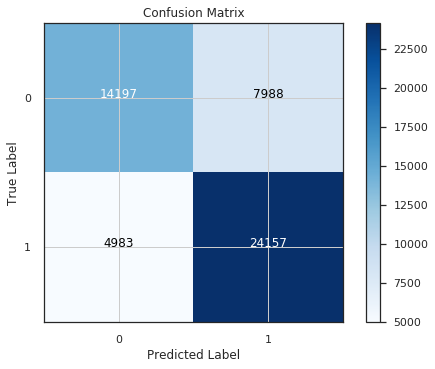

In [126]:
#best RF2 model
best_rf2 = RandomForestClassifier(max_depth = 35, min_samples_split = 0.001,  n_estimators = 400)
best_rf2.fit(X_train, y_train)

rf_y_hat_train2 = best_rf2.predict(X_train)
rf_y_hat_test2 = best_rf2.predict(X_test)

print("Random Forest score for training set: ", round(best_rf2.score(X_train, y_train), 5))
print("Random Forest score for testing set: ", round(best_rf2.score(X_test, y_test),5))
print("\nClassification Report")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

By log-transforming the data and increasing the number of estimators, the average weighted f1 score increased to 0.75. Overfitting still appears to be an issue. Because PCA wasn't used for this model, we will be able see the feature importance.

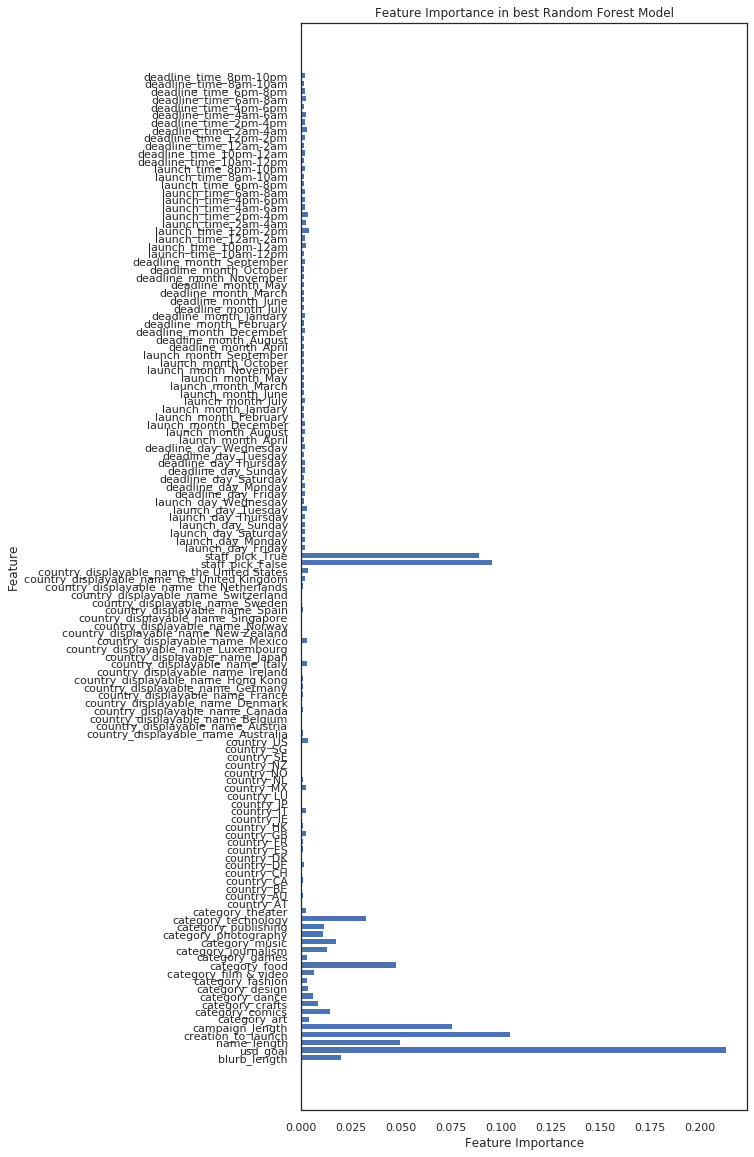

In [127]:
#plot feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8, 20))
plt.barh(range(n_features), best_rf2.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), X_train.columns.values)
plt.title('Feature Importance in best Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show();

In [128]:
#top 10 importance features
important_features = sorted(list(zip(X_train.columns.values,best_rf2.feature_importances_)),key=lambda x: -1 * x[1])[:10]
feature_lst = []
feature_value = []
for feature in important_features:
    feature_lst.append(feature[0])
    feature_value.append(feature[1])
print(feature_lst)
print(feature_value)
print(n_features)

['usd_goal', 'creation_to_launch', 'staff_pick_False', 'staff_pick_True', 'campaign_length', 'name_length', 'category_food', 'category_technology', 'blurb_length', 'category_music']
[0.21303425671245896, 0.10493641059861399, 0.095670909893141, 0.08920214133456432, 0.07579415311583791, 0.04956899042786768, 0.047442486813562966, 0.03245143487162837, 0.020032221203002673, 0.01746082927258439]
128


Text(0, 0.5, 'Feature')

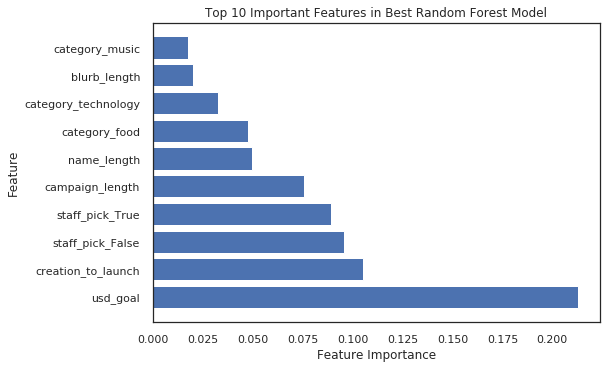

In [129]:
plt.barh(range(10), feature_value, align = 'center')
plt.yticks(np.arange(10), feature_lst)
plt.title('Top 10 Important Features in Best Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

As we can see from the plot above, goal size has the greatest importance, followed by number of days between creation to launch and whether or not the project was a staff pick.
Campaign length and name length are also important.
The type of project(category) isn't extremely important, although whether or not the project is a food project or technology project seems to be a little important.
Launch and deadline times don't seem to be important.
Country and origin of project isn't important either.

### Model: XGBoost without PCA

This XGBoost model will be run with log-transformed data and without PCA, to further improve upon the Random Forest model and to see there is a similarity in feature importance

In [130]:
#use GridsearchCV to test multiple parameters

xgb_start2 = time.time()
xgb2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 6, verbose = 2)

params_xgb2 = [
    {'n_estimators': [100, 200],
    'subsample': [0.7, 0.9],
    'min_child_weight': [1,3,5]}
]

grid_xgb2 = GridSearchCV(estimator= xgb2, param_grid = params_xgb2, cv = 5)
grid_xgb2.fit(X_train, y_train)

xgb_end2 = time.time()

xgb_best_score2 = grid_xgb2.best_score_
xgb_best_params2 = grid_xgb2.best_params_

print(f"Time taken to run: {round((xgb_end2 - xgb_start2)/60, 2)} minutes")
print("Best accuracy: ",round(xgb_best_score2, 2))
print("Best parameters: ", xgb_best_params2)

/home/hazel/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:09] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:10:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:27] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:10:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluat

[23:15:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:17] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:16:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:50] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language b

[23:21:48] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:21:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:05] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:22:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluat

[23:29:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:19] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:29:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:39] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language b

[23:35:54] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:35:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:27] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:36:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluat

[23:38:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost score for training set:  0.73884
XGBoost score for testing set:  0.71914

Classification report
              precision    recall  f1-score   support

           0       0.68      0.66      0.67     22185
           1       0.75      0.76      0.76     29140

    accuracy                           0.72     51325
   macro avg       0.71      0.71      0.71     51325
weighted avg       0.72      0.72      0.72     51325



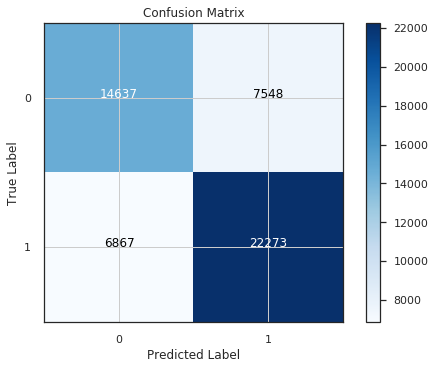

In [131]:
best_xgb2 = xgb.XGBClassifier(learning_rate = 0.1, max_depth=35, min_child_weight = 5, n_estimators = 200, subsample = 0.9)
best_xgb2.fit(X_train, y_train)

xgb_y_hat_train2 = best_xgb.predict(X_train)
xgb_y_hat_test2 = best_xgb.predict(X_test)

print("XGBoost score for training set: ", round(best_xgb.score(X_train, y_train), 5))
print("XGBoost score for testing set: ", round(best_xgb.score(X_test, y_test), 5))
print("\nClassification report")
print(classification_report(y_test, xgb_y_hat_test2))
plot_cf(y_test, xgb_y_hat_test2)

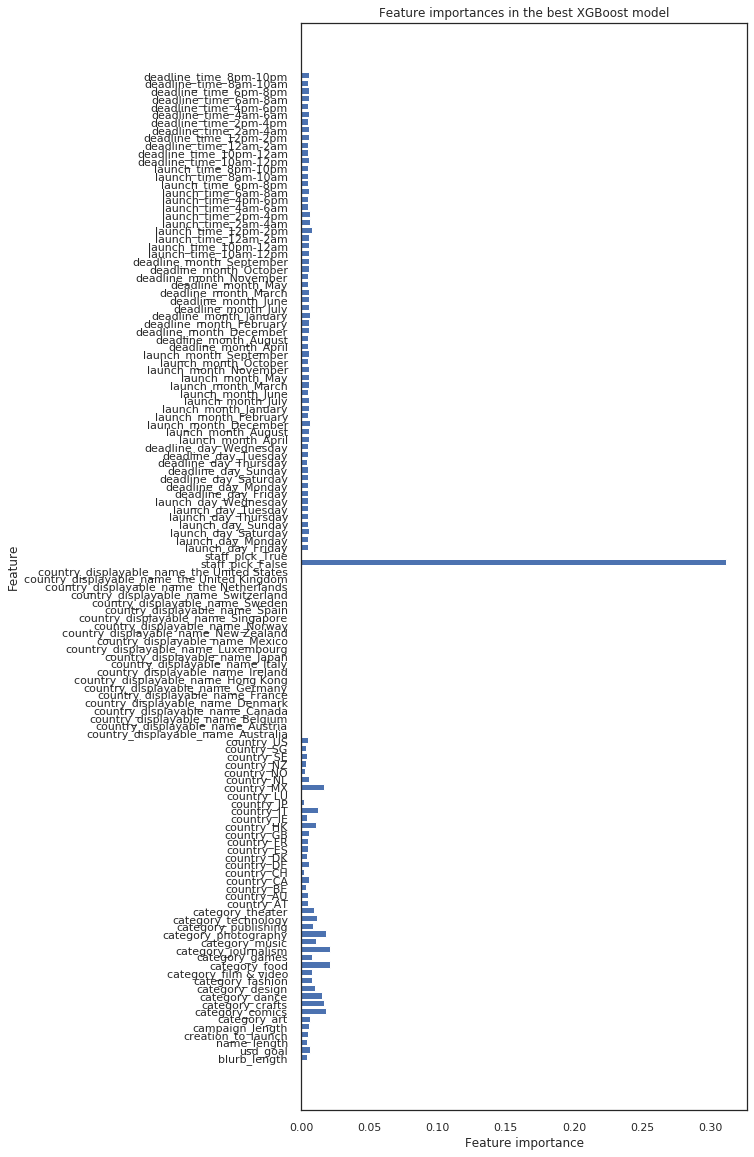

In [132]:
#plot feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_xgb2.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best XGBoost model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

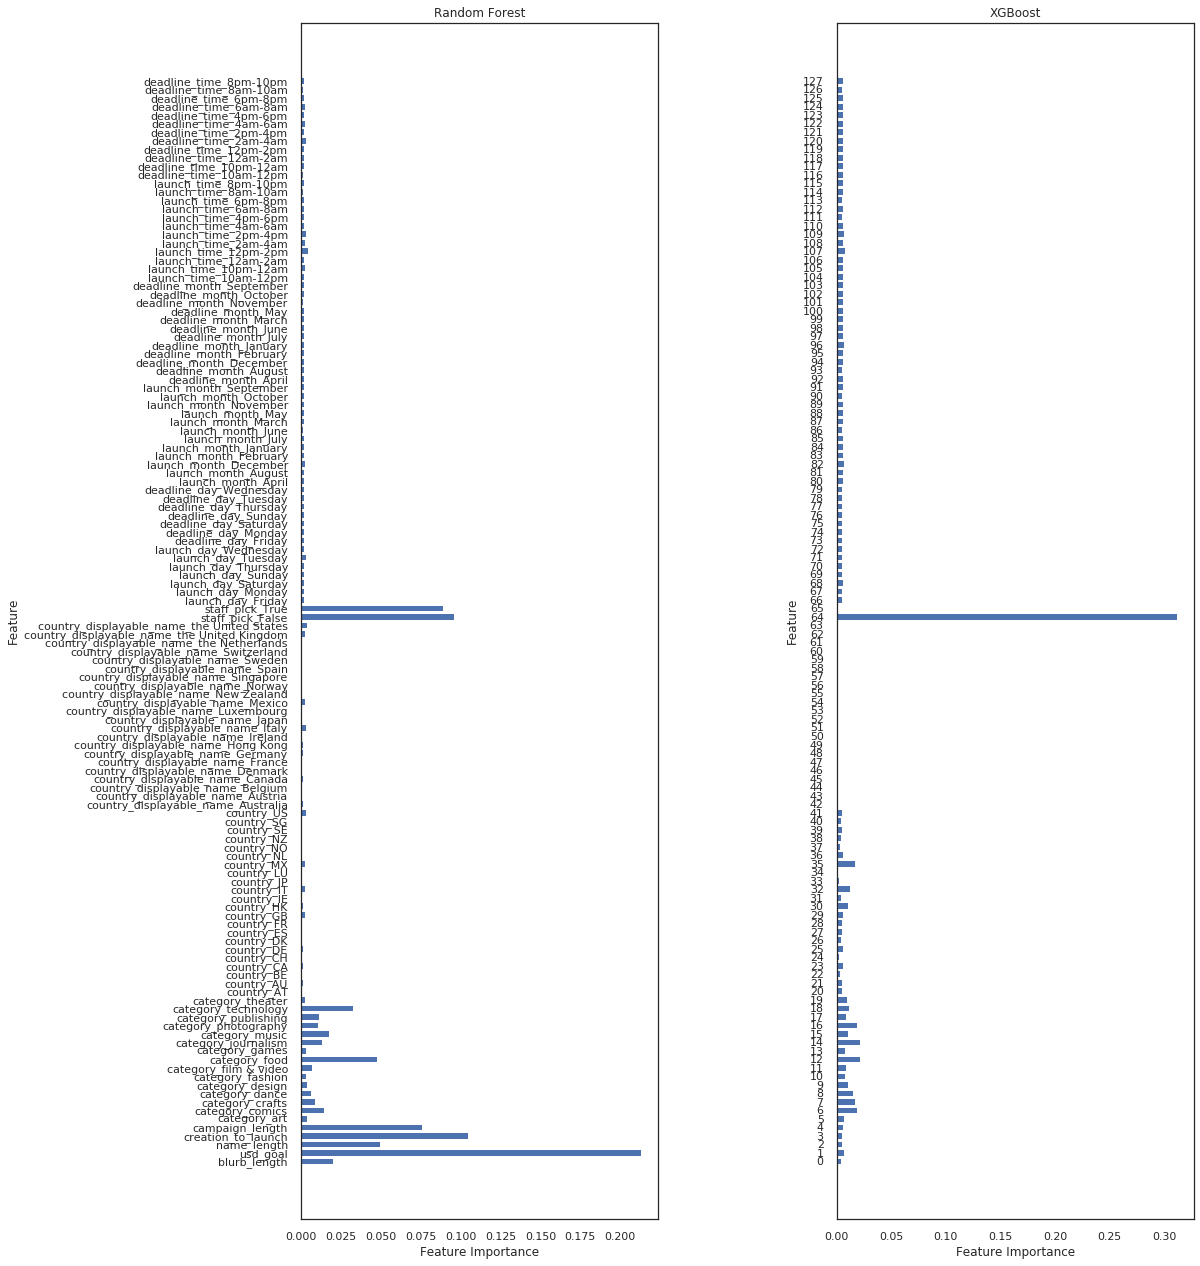

In [133]:
#compare XGBoost and Random Forest feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,22))
n_features = X_train.shape[1]
ax1.barh(range(n_features), best_rf2.feature_importances_, align = 'center')
ax1.set_yticks(np.arange(n_features))
ax1.set_yticklabels(X_train.columns.values)
ax1.set_title('Random Forest')
ax1.set_xlabel('Feature Importance')
ax1.set_ylabel('Feature')

ax2.barh(range(n_features), best_xgb2.feature_importances_, align = 'center')
ax2.set_yticks(np.arange(n_features))
ax2.set_title('XGBoost')
ax2.set_xlabel('Feature Importance')
ax2.set_ylabel('Feature')
fig.subplots_adjust(wspace = 0.5);

### Additional investigation of PCA

The graph of the feature importance above showed that the launch and deadline days, months and times are not important. So, filtering out unimportant features might be useful in creating a more efficient PCA model.

In [134]:
#drop columns with deadline
X_filtered = X_log[[c for c in X_log.columns if c[:8] != 'deadline']]

#drop columns with launch
X_filtered = X_log[[c for c in X_log.columns if c[:6] != 'launch']]

X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.701501,-0.453015,0.831305,-0.227219,-0.147868,-0.349459,-0.200646,5.389435,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
1,-1.084795,0.076934,0.599445,-0.070890,-0.064180,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,3.982506,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
2,0.065087,1.113223,0.331783,-0.011456,-0.231556,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,2.790431,-0.182356,-0.35111
3,0.065087,-0.547010,0.831305,1.944961,2.279083,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
4,1.023322,0.892998,-0.372254,0.040028,-1.570564,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111


Text(0, 0.5, 'Explained variance')

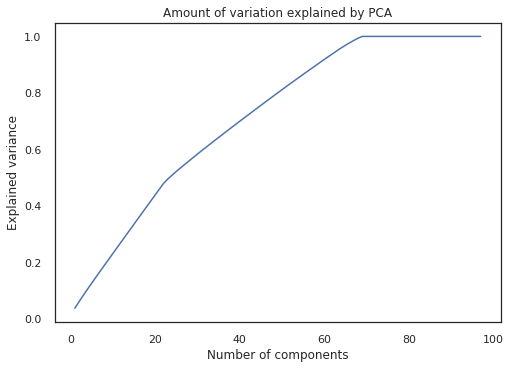

In [135]:
#build PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

#plot amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Similar to before, there is no clear elbow and few of the components explaining the majority of the variation

In [136]:
#create a list of PCA names
pca_cols = []
for i in range(1,98):
    pca_cols.append("PC" + str(i))

#Create a dataframe for prinicpal components
princ_comps_df = pd.DataFrame(principal_comps, columns = pca_cols)

In [137]:
#Add target (success/fail) to principal components dataframe
princ_comps_df = pd.concat([princ_comps_df, y_log.reset_index()], axis = 1)
princ_comps_df.drop('id', inplace = True, axis = 1)
princ_comps_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,state
0,-1.337901,-0.380463,-0.744856,0.067668,0.154344,-0.096449,0.172831,0.259009,-0.106863,-0.078688,...,3.718380e-16,1.634274e-15,7.202661e-16,2.563423e-16,2.080085e-15,1.085564e-15,8.334497e-16,-1.004451e-19,1.054547e-16,1
1,-1.151304,1.474796,3.098003,0.667372,0.374575,0.590869,-0.103223,-0.322881,0.095745,0.294951,...,-1.422897e-15,-6.884960e-15,4.115653e-16,2.256659e-15,-8.973233e-15,-4.148471e-15,-5.187490e-16,6.397926e-16,3.104277e-18,1
2,-1.144586,0.142148,-0.174612,-0.286687,-0.182826,-0.199042,-0.045028,-0.039862,-0.016272,-0.075329,...,1.042050e-16,7.669428e-16,3.710800e-17,-7.985270e-17,1.240750e-15,4.594204e-16,-1.280452e-17,-1.125275e-16,-1.050355e-17,0
3,-1.266748,-0.635397,0.046114,-0.109968,0.089615,0.060636,0.250802,0.003547,0.021699,-0.017089,...,1.768978e-15,3.166398e-15,-4.392866e-16,-1.073575e-15,4.033706e-15,1.609904e-15,2.008275e-16,-3.213104e-16,-1.719752e-17,1
4,-1.430549,-0.166668,-0.475693,0.039234,0.165628,-0.165109,-0.096852,0.043041,-0.054020,0.048697,...,-1.904124e-16,-1.351169e-15,9.812922e-18,3.226003e-18,-1.611530e-15,-6.420370e-16,4.909289e-18,1.530275e-16,-2.503917e-17,1


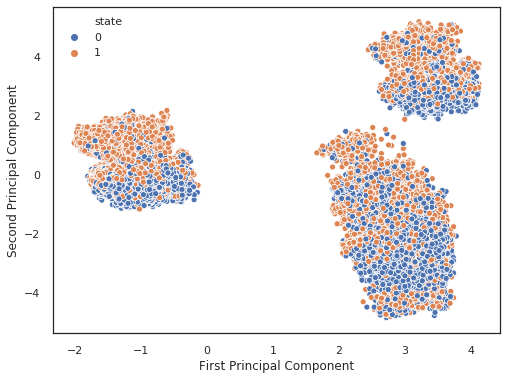

In [138]:
#plot the first two principal components, colored by target
plt.figure(figsize=(8,6))
sns.scatterplot(x = princ_comps_df.PC1, y = princ_comps_df.PC2, data = princ_comps_df, hue = 'state')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

The graph above reiterates the point that the first few components do not explain the variation very well. There is also a pattern seen in the data, but the reason is unclear. <br>

A final experiment will be conducted where the country will be dropped from the dataframe, as they do not explain much variance.

In [139]:
#drop country to see if this improves PCA
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:7] != 'country']]
X_filtered.head()

,blurb_length,usd_goal,name_length,creation_to_launch,campaign_length,category_art,category_comics,category_crafts,category_dance,category_design,...,deadline_time_12am-2am,deadline_time_12pm-2pm,deadline_time_2am-4am,deadline_time_2pm-4pm,deadline_time_4am-6am,deadline_time_4pm-6pm,deadline_time_6am-8am,deadline_time_6pm-8pm,deadline_time_8am-10am,deadline_time_8pm-10pm
0,-0.701501,-0.453015,0.831305,-0.227219,-0.147868,-0.349459,-0.200646,5.389435,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
1,-1.084795,0.076934,0.599445,-0.070890,-0.064180,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,3.982506,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
2,0.065087,1.113223,0.331783,-0.011456,-0.231556,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,-0.310549,-0.375352,-0.248338,2.790431,-0.182356,-0.35111
3,0.065087,-0.547010,0.831305,1.944961,2.279083,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111
4,1.023322,0.892998,-0.372254,0.040028,-1.570564,-0.349459,-0.200646,-0.185548,-0.133983,-0.190283,...,-0.301663,-0.251098,-0.31787,-0.328766,3.220106,-0.375352,-0.248338,-0.358368,-0.182356,-0.35111


Text(0, 0.5, 'Explained variance')

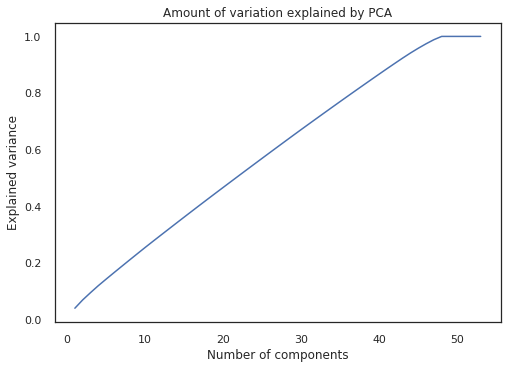

In [140]:
#build PCA
pca = PCA()
princ_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

#plot amount of variance explained by PCA with different number of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Unfortunately, the same pattern shows up.

### Potential Future Work

Further investigation into PCA, or using 68 components instead of 89 as this only had a slightly lower accuracy scores <br>
Further hyperparmater tuning for Random Forest and XGBoost.
Also, I think using more complex models like SVMs or neural networks would be useful for predicting success. Finally using NLP to further analyze blurb length(blurb length refers to the brief summary about the project) and see if that feature affects success.

# Conclusion and Recommendations

### Choosing the final model

In [141]:
#extract the weighted average precision, recall and test scores from each of the best model
# Logistic regression
lr_test_precision, lr_test_recall, lr_test_f1score, lr_test_support = precision_recall_fscore_support(y_test, lr_y_hat_test2, average='weighted')
lr_train_precision, lr_train_recall, lr_train_f1score, lr_train_support = precision_recall_fscore_support(y_train, lr_y_hat_train2, average='weighted')
# Random Forest
rf_test_precision, rf_test_recall, rf_test_f1score, rf_test_support = precision_recall_fscore_support(y_test, rf_y_hat_test2, average='weighted')
rf_train_precision, rf_train_recall, rf_train_f1score, rf_train_support = precision_recall_fscore_support(y_train, rf_y_hat_train2, average='weighted')
# XGBoost
xgb_test_precision, xgb_test_recall, xgb_test_f1score, xgb_test_support = precision_recall_fscore_support(y_test, xgb_y_hat_test2, average='weighted')
xgb_train_precision, xgb_train_recall, xgb_train_f1score, xgb_train_support = precision_recall_fscore_support(y_train, xgb_y_hat_train2, average='weighted')

In [142]:
#logistic regression results
lr_results = {'Precision': [lr_train_precision, lr_test_precision], 'Recall': [lr_train_recall, lr_test_recall], 
             'F1 Score': [lr_train_f1score, lr_test_f1score]}
lr_results = pd.DataFrame(lr_results, index = ['Train', 'Test'])
print('Best Logistic Regression results (Model 5)')
lr_results

Best Logistic Regression results (Model 5)


,Precision,Recall,F1 Score
Train,0.735130,0.736441,0.734450
Test,0.734013,0.735392,0.733112


In [143]:
#random forest results
rf_results = {'Precision': [rf_train_precision, rf_test_precision], 'Recall': [rf_train_recall, rf_test_recall],
             'F1 Score': [rf_train_f1score, rf_test_f1score]}
rf_results = pd.DataFrame(rf_results, index = ['Train', 'Test'])
print('Best Random Forest results (Model 6)')
rf_results

Best Random Forest results (Model 6)


,Precision,Recall,F1 Score
Train,0.780569,0.780197,0.777732
Test,0.746615,0.747277,0.744293


In [144]:
#xgboost results
xgb_results = {'Precision': [xgb_train_precision, xgb_test_precision], 'Recall': [xgb_train_recall, xgb_test_recall],
              'F1 Score': [xgb_train_f1score, xgb_test_f1score]}
xgb_results = pd.DataFrame(xgb_results, index = ['Train', 'Test'])
xgb_results

,Precision,Recall,F1 Score
Train,0.737929,0.738838,0.738175
Test,0.718264,0.719143,0.718576


### Final model evaluation and interpretation

Each model was able to achieve an accuracy of between 70%-74% after parameter tuning. Although it was easy to achieve an accuracy of 70%, after parameter tuning the accuracy only increased by a small amount. It is possible that the large amount of data only in two categories meant that there was enough data to perform a simple model (like basic logistic regression). <br>

The final model choosen was the Random Forest model with an F1 score of 0.744. <br>

Interestingly, each model performed did not do a good job of predicting failures compared to successful projects, with a lower true negative than true positive rate. It is likely that things that cause projects to fail are outside the scope of the given data, eg. poor marketing, insufficient updates or not not replying to potential backers.


In [145]:
r_cf = confusion_matrix(y_test, rf_y_hat_test2)
print('\nEvaluation of final model')
print('\nIf the true value is failure, what proportion does the model correctly predict as a failure? \nThe true negative rate is is:\n'
     ,round(r_cf[0][0]/sum(r_cf[0]),4))
print('\nIf the true value is a success, what proportion does the model correctly predict a success? \nThe true positve rate is:\n',
     round(r_cf[1][1]/sum(r_cf[1]), 4))
print('\nIf the model predicts a failure, what proportion are actually failures? \n(Negative prediction value:\n)', 
      round(r_cf[0][0]/sum(r_cf[:, 0]),4))
print('\nIf the model predicts a success, what proportion are actually successful? \n(Positive prediction value:\n)', 
      round(r_cf[1][1]/sum(r_cf[:, 1]), 4))


Evaluation of final model

If the true value is failure, what proportion does the model correctly predict as a failure? 
The true negative rate is is:
 0.6399

If the true value is a success, what proportion does the model correctly predict a success? 
The true positve rate is:
 0.829

If the model predicts a failure, what proportion are actually failures? 
(Negative prediction value:
) 0.7402

If the model predicts a success, what proportion are actually successful? 
(Positive prediction value:
) 0.7515


### Recommendations

Some of the featues had a positive effect on the sucess rate and/or the amount of money received (as deduced by feature importance and feature engineering): <br>

Most Important: <br>
1. Smaller project goals <br>
2. Being choosen as a staff pick <br>
3. Shorter campaigns <br>
4. Longer campaign to launch duration <br>
5. Comics, dance and games projects <br>

Least Important: <br>
1. Projects from Hong Kong <br>
2. Launching a project on a Tuesday (this is the most popular day to launch a project, so beware competition) <br>
3. Name length and blurb length (shorter blurbs and longer names are preferred) <br>
4. Film and music projects are most popular categories on site and are fairly successful <br>
5. Launching a campaign between 12pm and 2pm UTC (related to country of origin) <br>

The factors that had the most negative effect on success rate and/or the amount of money receieved are: <br>

Most Important: <br>
1. Larger goals <br>
2. Longer campaigns <br>
3. Food and journalism projects <br>
4. Projects from Italy <br>

Least Important: <br>
1. Launching on the weekend <br>
2. Launching in July or December <br>
3. Launching between 4am and 6am UTC <br>

Overall, Kickstarter is well-suited for smaller, high quality projects(particularly comics, dances and games) and less-suited to larger projects like journalism and food projects.